In [1]:
#导入数据

In [180]:
#导入pandas数据库，用于数据处理
import pandas as pd

# 读取Excel文件
file_path = 'ruc_Class25Q2_train_price.xlsx'

try:
    # 读取Excel，第一行为表头（指标名称）
    df = pd.read_excel(
        file_path,
        header=0,  # 第一行作为列名（指标名称）
        usecols='A:BC',  # 指定读取A列到BC列（注意：包含BC列，列处理和数字处理左右端点的包含与否规则不同）的所有指标
        engine='openpyxl'  # 处理.xlsx格式的引擎
    )
    
    # 查看数据基本信息，确认导入成功
    print(f"数据导入成功！共 {df.shape[0]} 行样本，{df.shape[1]} 列指标")
    print("\n前5行数据预览：")
    print(df.head())#head()用于查看数据前5行，确保数据成功导入
    
except FileNotFoundError:
    print(f"错误：未找到文件 '{file_path}'，请检查文件路径是否正确")
except Exception as e:
    print(f"数据读取失败：{str(e)}")

数据导入成功！共 103871 行样本，55 列指标

前5行数据预览：
   城市   区域    板块    环线         Price      房屋户型        所在楼层     建筑面积     套内面积  \
0   0  109   150  二至三环  6.194049e+06  2室1厅1厨1卫   中楼层 (共5层)    52.3㎡      NaN   
1   0   65   299  五至六环  4.354153e+06  3室1厅1厨1卫    顶层 (共6层)  127.44㎡   123.7㎡   
2   0   62   911  五至六环  3.321992e+06  3室2厅1厨2卫   低楼层 (共6层)  118.02㎡  101.95㎡   
3   0  123  1102   六环外  7.895656e+06  6室3厅1厨3卫    底层 (共2层)  293.23㎡  293.23㎡   
4   0   81   295  三至四环  1.902960e+06     1房间1卫  中楼层 (共10层)   39.85㎡   29.94㎡   

      房屋朝向  ...     供水        供暖     供电            燃气费       供热费     停车位  \
0      南 北  ...     民水      集中供暖     民电       2.61元/m³     30元/㎡   300.0   
1      南 北  ...  商水/民水       自采暖  商电/民电       2.61元/m³       NaN  1550.0   
2       东南  ...  商水/民水  集中供暖/自采暖  商电/民电       2.61元/m³     30元/㎡   324.0   
3  东 南 西 北  ...     民水       自采暖     民电  2.61-2.63元/m³       NaN   500.0   
4        南  ...  商水/民水  集中供暖/自采暖  商电/民电  2.61-2.63元/m³  30-45元/㎡  1800.0   

   停车费用     coord_x    co

In [181]:
print(df['Price'].describe())

count    1.038710e+05
mean     2.262366e+06
std      2.532925e+06
min      7.455330e+04
25%      8.910913e+05
50%      1.479407e+06
75%      2.680757e+06
max      5.622643e+07
Name: Price, dtype: float64


In [182]:
#剔除无关、重复信息，减小数据处理的工作量

In [183]:
#首先通过分析剔除显然与房屋价格无关的指标
#P列交易时间，R列上次交易，V列抵押信息，与AB列AC列经度纬度完全相同的BA列BB列，AJ列开发商，AM列物业公司，AR列物业办公电话，BC列客户反馈
df = df.drop(columns=['交易时间'])
df = df.drop(columns=['上次交易'])
df = df.drop(columns=['抵押信息'])
df = df.drop(columns=['coord_x'])
df = df.drop(columns=['coord_y'])
df = df.drop(columns=['开发商'])
df = df.drop(columns=['物业公司'])
df = df.drop(columns=['物业办公电话'])
df = df.drop(columns=['客户反馈'])
#接着剔除显然与其他核心指标重复度高的指标
#X列核心卖点，Y列户型介绍，Z列周边配套，AA列交通出行的信息完全可以在其他列中反馈出来
df = df.drop(columns=['核心卖点'])
df = df.drop(columns=['户型介绍'])
df = df.drop(columns=['周边配套'])
df = df.drop(columns=['交通出行'])
#AE列区县、AF列板块_comm、AG列环线位置分别与B列区域、C列板块、D列环线完全相同，选择删除特征AE、AF、AG
df = df.drop(columns=['区县'])
df = df.drop(columns=['板块_comm'])
df = df.drop(columns=['环线位置'])

print(f"数据概况：共 {df.shape[0]} 行样本，{df.shape[1]} 列指标")
print("\n前5行数据预览：")
print(df.head())#head()用于查看数据前5行，检查数据

数据概况：共 103871 行样本，39 列指标

前5行数据预览：
   城市   区域    板块    环线         Price      房屋户型        所在楼层     建筑面积     套内面积  \
0   0  109   150  二至三环  6.194049e+06  2室1厅1厨1卫   中楼层 (共5层)    52.3㎡      NaN   
1   0   65   299  五至六环  4.354153e+06  3室1厅1厨1卫    顶层 (共6层)  127.44㎡   123.7㎡   
2   0   62   911  五至六环  3.321992e+06  3室2厅1厨2卫   低楼层 (共6层)  118.02㎡  101.95㎡   
3   0  123  1102   六环外  7.895656e+06  6室3厅1厨3卫    底层 (共2层)  293.23㎡  293.23㎡   
4   0   81   295  三至四环  1.902960e+06     1房间1卫  中楼层 (共10层)   39.85㎡   29.94㎡   

      房屋朝向  ...           物 业 费   建筑结构_comm             产权描述     供水        供暖  \
0      南 北  ...   1.3-1.65元/月/㎡       板楼/平房  商品房/已购公房/央产房/私产     民水      集中供暖   
1      南 北  ...       0.65元/月/㎡          板楼   商品房/一类经济适用房/私产  商水/民水       自采暖   
2       东南  ...  1.98-2.98元/月/㎡          板楼        商品房/限价商品房  商水/民水  集中供暖/自采暖   
3  东 南 西 北  ...     3-6.07元/月/㎡          板楼              商品房     民水       自采暖   
4        南  ...    4.8-5.5元/月/㎡  塔楼/板楼/塔板结合              商品房  商水/民水  集中供暖/自采暖  

In [184]:
#数据清洗——处理缺失值

In [185]:
#检查各个指标的缺失情况

In [186]:
import pandas as pd

# 计算每列缺失值数量和比例
missing_stats = pd.DataFrame({
    '缺失值数量': df.isnull().sum(),
    '缺失值比例(%)': df.isnull().mean() * 100  # 转换为百分比
})

# 按缺失比例分类标注
def classify_missing(ratio):
    if ratio < 5:
        return '低比例缺失（<5%）'
    elif 5 <= ratio <= 30:
        return '中比例缺失（5%-30%）'
    else:
        return '高比例缺失（>30%）'

missing_stats['缺失类型'] = missing_stats['缺失值比例(%)'].apply(classify_missing)

# 按缺失比例从高到低排序，便于观察
missing_stats = missing_stats.sort_values(by='缺失值比例(%)', ascending=False)

# 输出结果
print("各列缺失值统计（按缺失比例降序排列）：")
print(missing_stats)

# 可选：单独打印不同类型的列名，方便后续处理
print("\n低比例缺失列：", list(missing_stats[missing_stats['缺失类型'] == '低比例缺失（<5%）'].index))
print("中比例缺失列：", list(missing_stats[missing_stats['缺失类型'] == '中比例缺失（5%-30%）'].index))
print("高比例缺失列：", list(missing_stats[missing_stats['缺失类型'] == '高比例缺失（>30%）'].index))

各列缺失值统计（按缺失比例降序排列）：
            缺失值数量   缺失值比例(%)           缺失类型
别墅类型       102428  98.610777    高比例缺失（>30%）
供暖          72926  70.208239    高比例缺失（>30%）
供热费         72488  69.786562    高比例缺失（>30%）
套内面积        67887  65.357029    高比例缺失（>30%）
环线          63452  61.087310    高比例缺失（>30%）
房屋年限        44510  42.851229    高比例缺失（>30%）
停车费用        35553  34.228033    高比例缺失（>30%）
建筑年代        35101  33.792878    高比例缺失（>30%）
停车位         34568  33.279741    高比例缺失（>30%）
容 积 率       33154  31.918437    高比例缺失（>30%）
绿 化 率       32883  31.657537    高比例缺失（>30%）
燃气费         32701  31.482319    高比例缺失（>30%）
物 业 费       31158  29.996823  中比例缺失（5%-30%）
供水          30298  29.168873  中比例缺失（5%-30%）
供电          30292  29.163097  中比例缺失（5%-30%）
建筑结构_comm   29119  28.033811  中比例缺失（5%-30%）
物业类别        28413  27.354122  中比例缺失（5%-30%）
产权描述        28413  27.354122  中比例缺失（5%-30%）
房屋优势        21236  20.444590  中比例缺失（5%-30%）
配备电梯        12351  11.890711  中比例缺失（5%-30%）
房屋总数         7131   6.865246  中比例缺失（5%-30%）
楼栋总数        

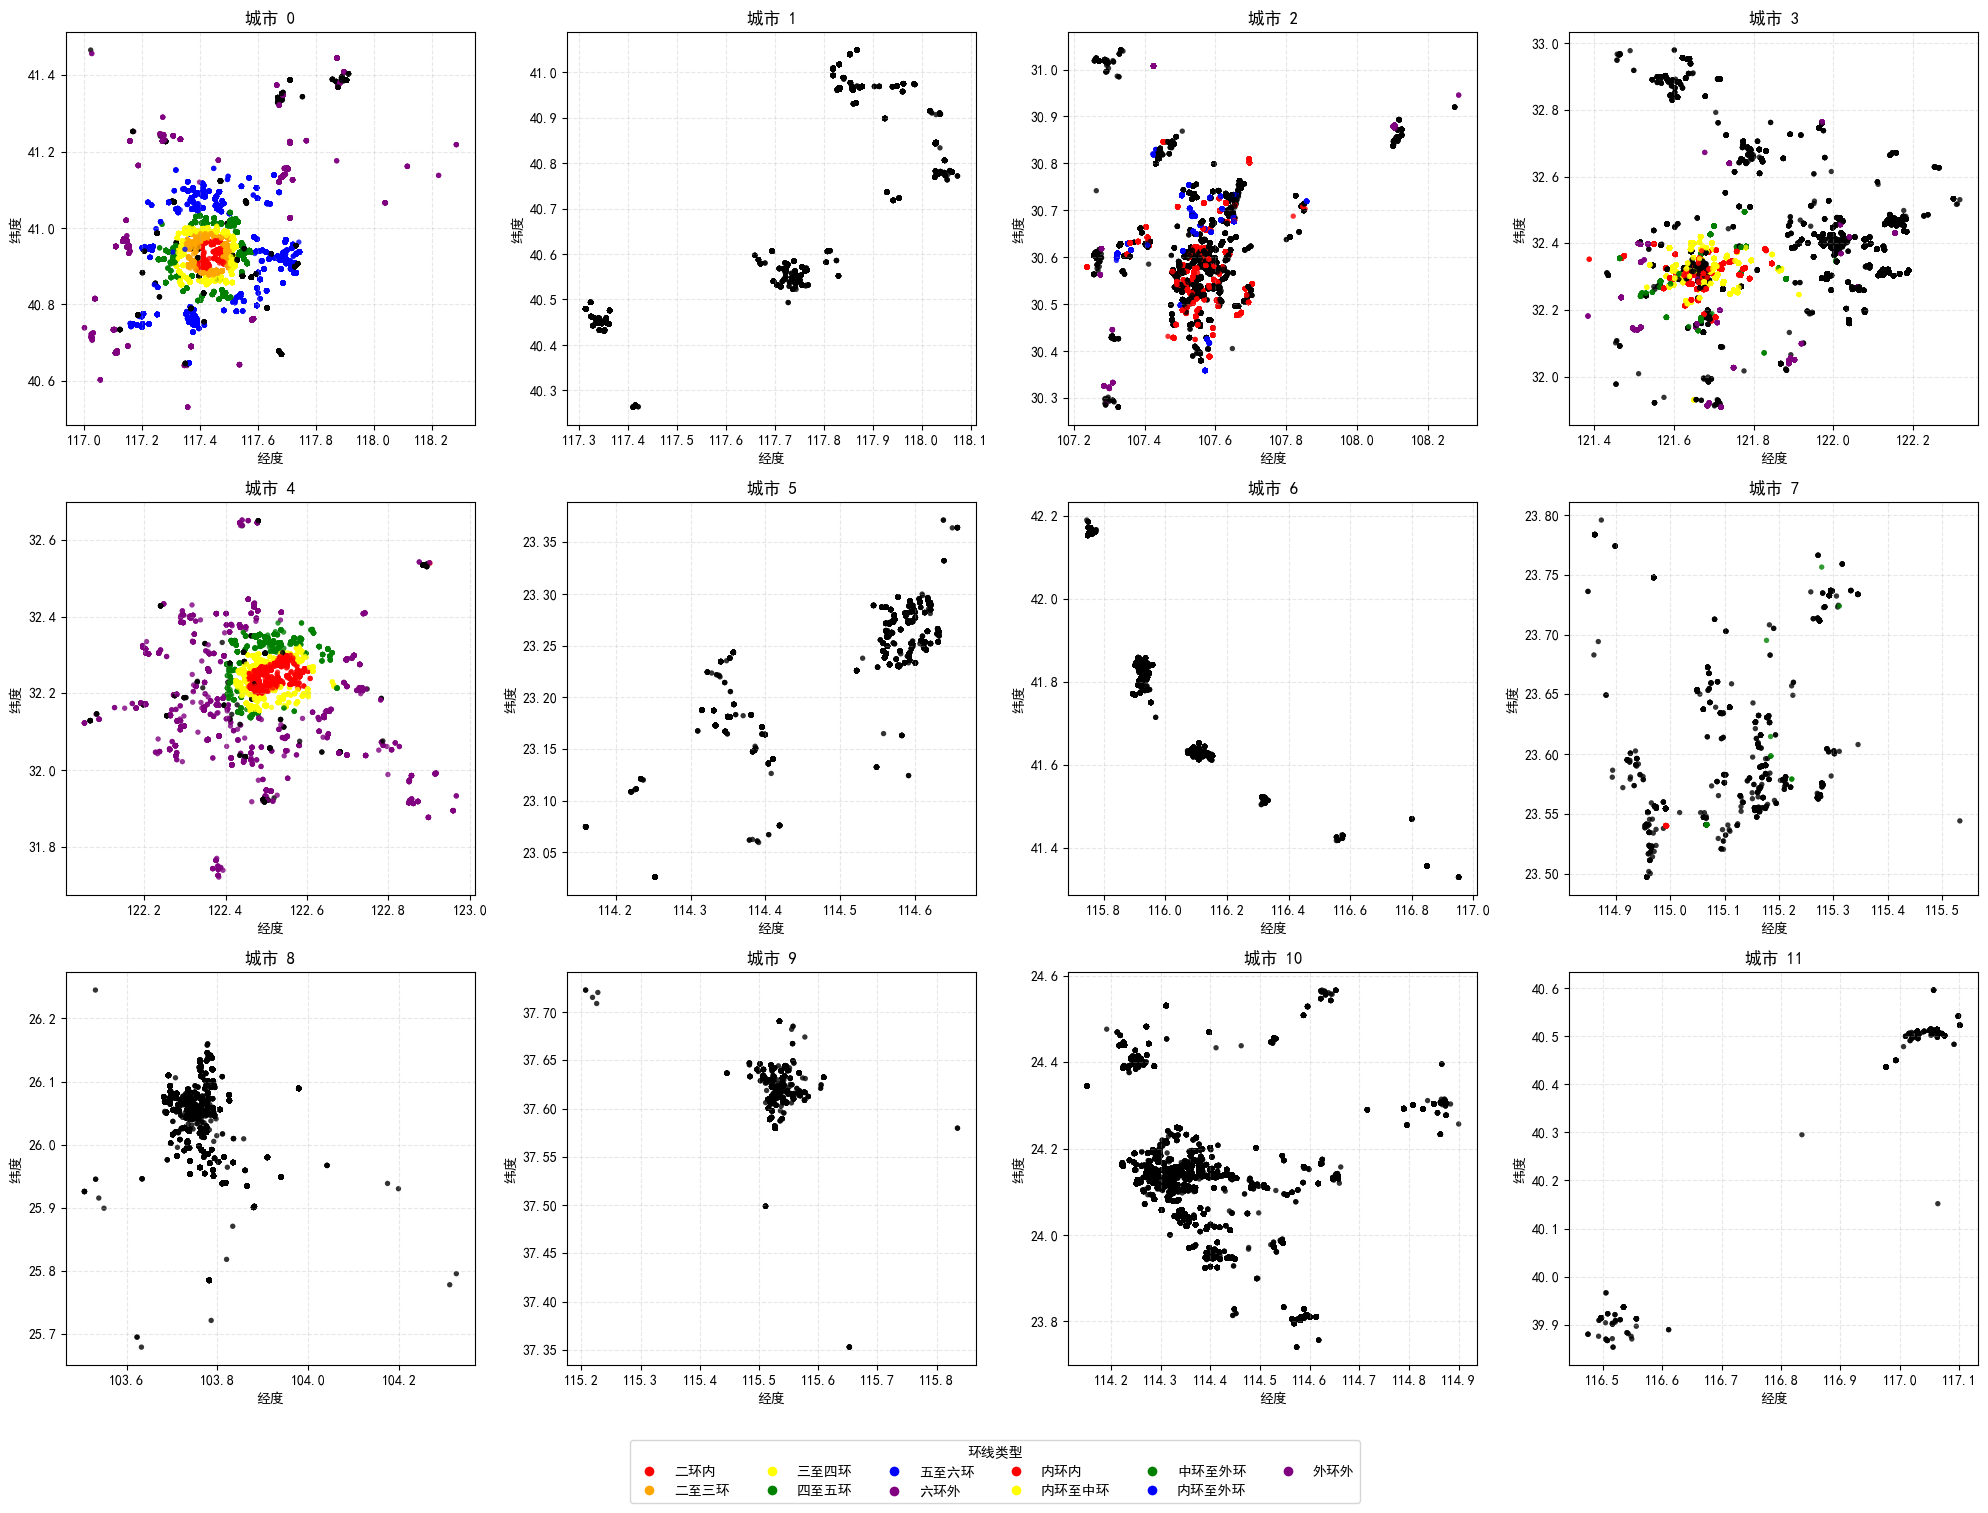

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置Windows中文字体，确保标题和标签正常显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 1. 定义环线与颜色的映射关系（严格按照需求配置）
color_mapping = {
    # 空白值处理（包含NaN和空字符串）
    np.nan: 'black',
    '': 'black',
    # 环线类型对应颜色
    '二环内': 'red',
    '二至三环': 'orange',
    '三至四环': 'yellow',
    '四至五环': 'green',
    '五至六环': 'blue',
    '六环外': 'purple',
    '内环内': 'red',
    '内环至中环': 'yellow',
    '中环至外环': 'green',
    '内环至外环': 'blue',
    '外环外': 'purple'
}

# 2. 数据预处理
# 确保城市列为整数类型（0-11）
df['城市'] = df['城市'].astype(int)
# 将环线列的空白值统一转换为NaN，便于映射
df['环线'] = df['环线'].replace('', np.nan)

# 3. 获取所有城市并排序（确保0-11顺序）
cities = sorted(df['城市'].unique())
# 检查是否包含所有12个城市，若有缺失则提示
missing_cities = set(range(12)) - set(cities)
if missing_cities:
    print(f"注意：缺失以下城市的数据：{missing_cities}")

# 4. 创建12个子图（3行4列布局，适合12个城市）
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 宽20，高15，保证子图清晰
axes = axes.flatten()  # 转换为一维数组，方便循环遍历

# 5. 逐个城市绘制散点图
for i, city in enumerate(cities):
    # 筛选当前城市的数据
    city_df = df[df['城市'] == city].copy()
    
    # 根据环线列匹配颜色，未匹配的异常值默认黑色
    city_df['点颜色'] = city_df['环线'].map(color_mapping).fillna('black')
    
    # 绘制散点图：x=经度，y=纬度，颜色按环线规则
    axes[i].scatter(
        city_df['lon'], 
        city_df['lat'], 
        c=city_df['点颜色'],  # 点的颜色
        s=15,  # 点的大小（可根据数据量调整）
        alpha=0.8,  # 透明度（避免重叠过密）
        edgecolor='none'  # 无边框，突出颜色区分
    )
    
    # 设置子图标题和坐标轴标签
    axes[i].set_title(f'城市 {city}', fontsize=12)
    axes[i].set_xlabel('经度', fontsize=10)
    axes[i].set_ylabel('纬度', fontsize=10)
    axes[i].grid(linestyle='--', alpha=0.3)  # 浅色网格线，不干扰数据

# 6. 添加统一图例（解释颜色对应的环线类型）
# 提取非空白的环线类型和对应颜色（去重）
legend_items = {k: v for k, v in color_mapping.items() if k not in [np.nan, '']}
# 创建图例手柄
handles = [plt.Line2D(
    [0], [0], 
    marker='o', 
    color='w', 
    markerfacecolor=color, 
    markersize=8, 
    label=label
) for label, color in legend_items.items()]
# 放置图例（底部居中，6列分布）
fig.legend(
    handles=handles, 
    title='环线类型', 
    loc='lower center', 
    ncol=6, 
    bbox_to_anchor=(0.5, -0.01), 
    fontsize=10
)

# 调整布局，避免图例和子图重叠
plt.tight_layout(rect=[0, 0.05, 1, 1])  # 预留底部5%空间放图例
plt.show()

===== 数据基本信息 =====
总样本数：103871
环线数值非空样本数：40419
环线数值空缺样本数：63452
包含的城市列表：[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]

开始批量处理所有城市，共12个城市...


===== 处理城市 0 =====
样本总数：16491
已知环线样本：15101
需填充样本：1390


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


填充后有效样本数：16491（完成率：100.00%）


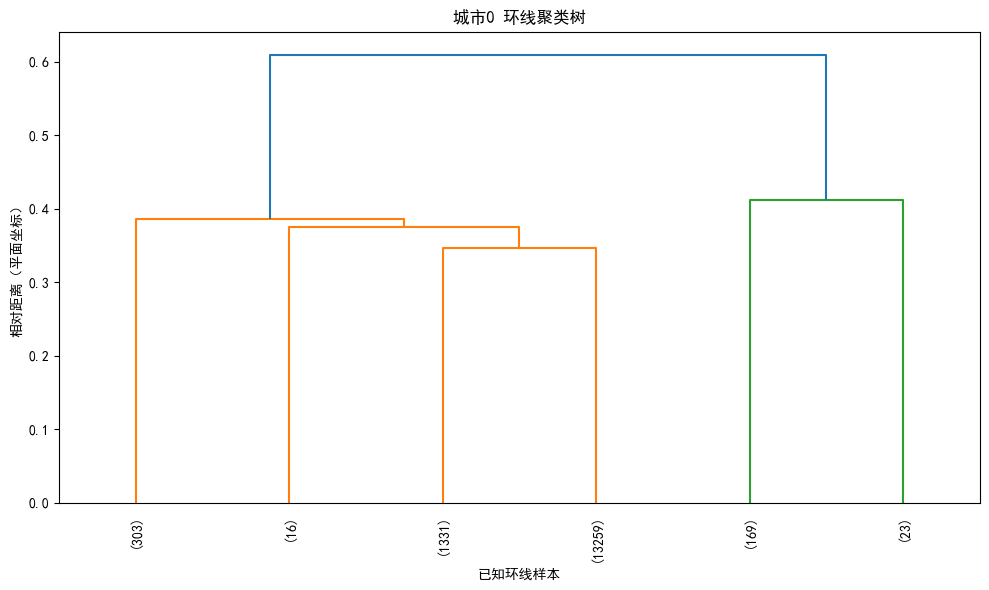

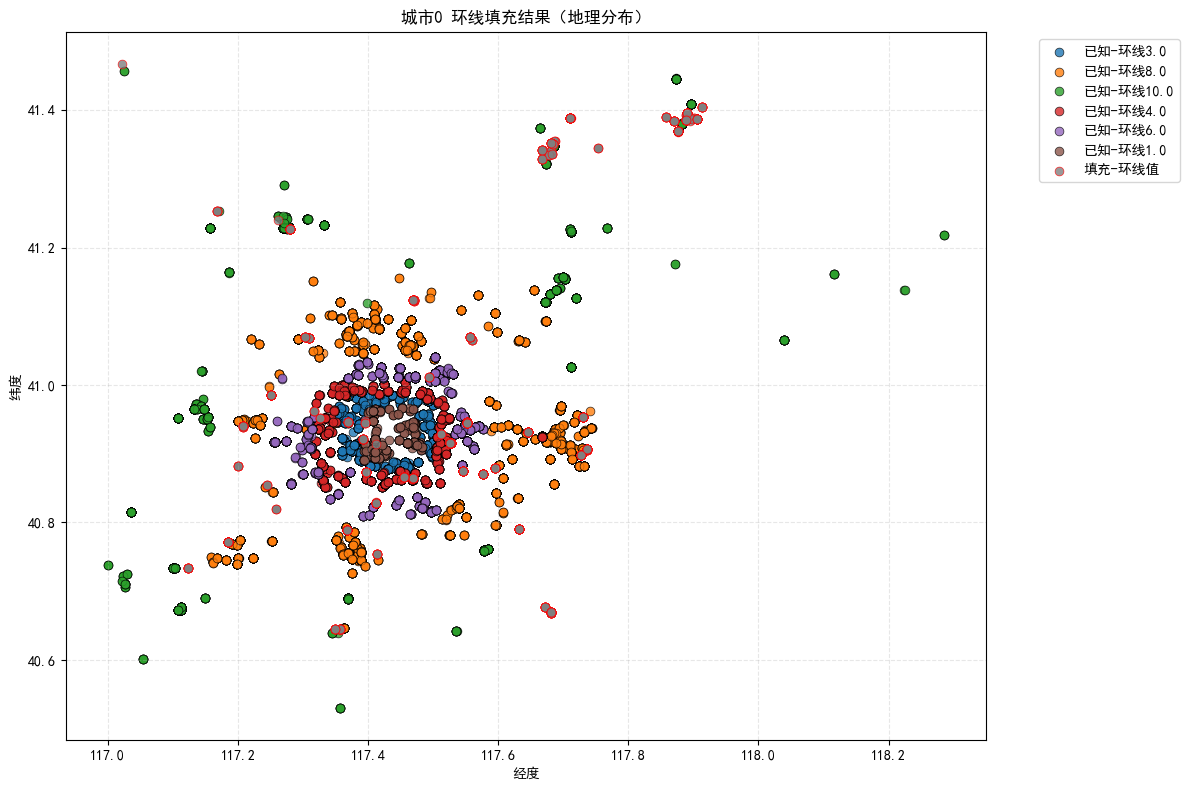


----- 处理城市0的区域 5 -----
区域样本数：364
区域环线分布：[np.float64(1.0), np.float64(3.0), np.float64(4.0)]


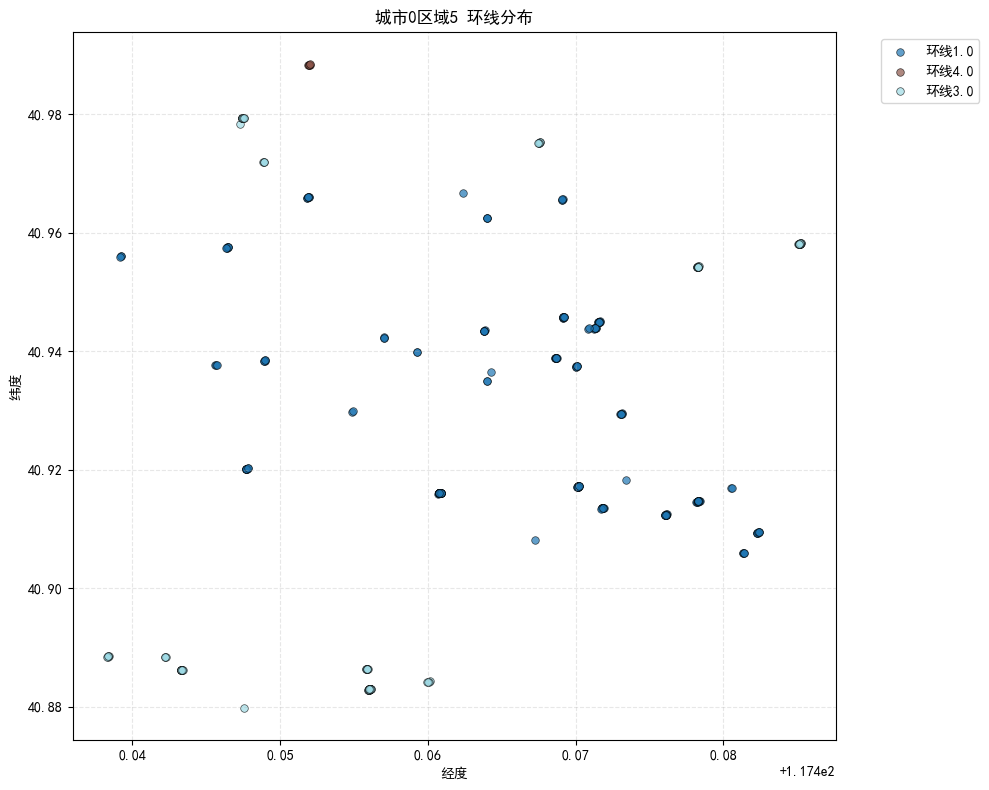

----- 处理区域5的板块 42 -----
板块样本数：2
板块环线分布：[np.float64(1.0)]


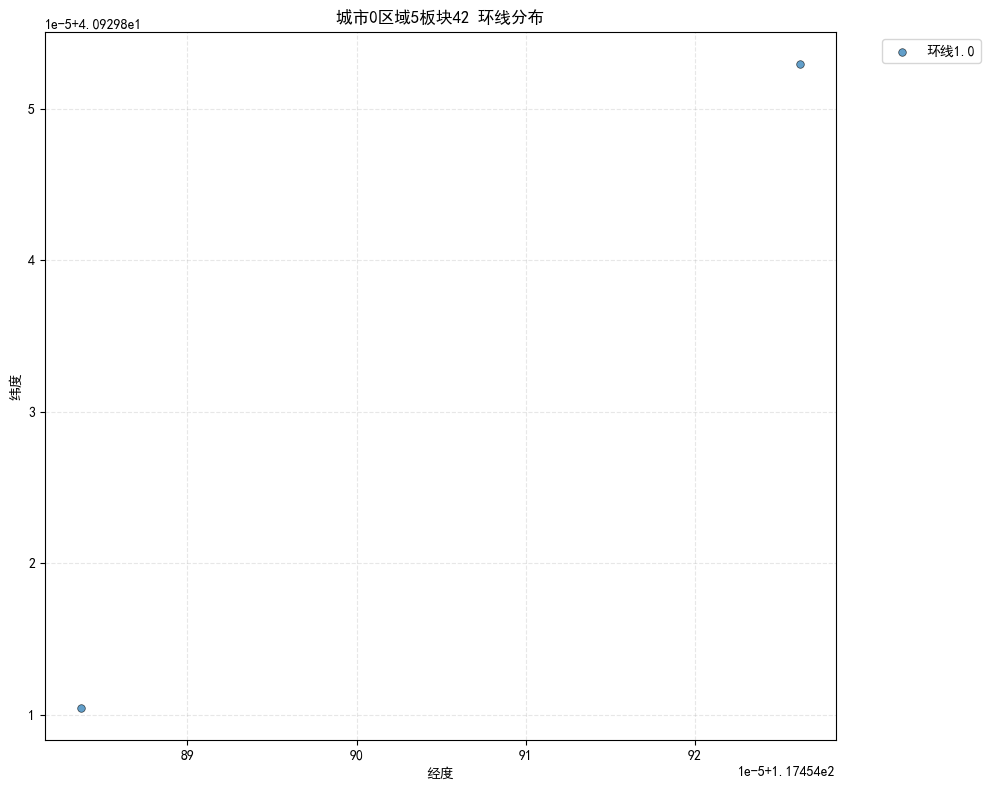


===== 处理城市 1 =====
样本总数：6437
已知环线样本：0
需填充样本：6437
警告：城市1无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


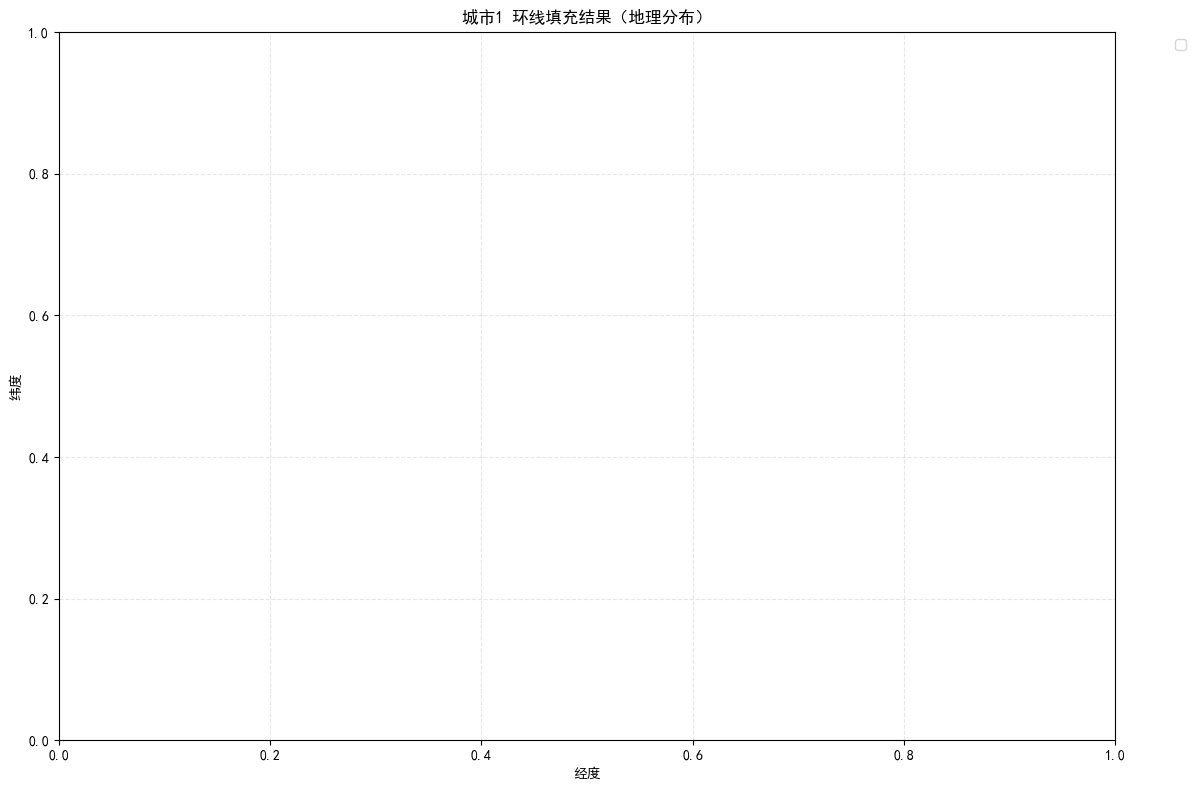


----- 处理城市1的区域 24 -----
区域样本数：1202
区域环线分布：[np.float64(nan)]


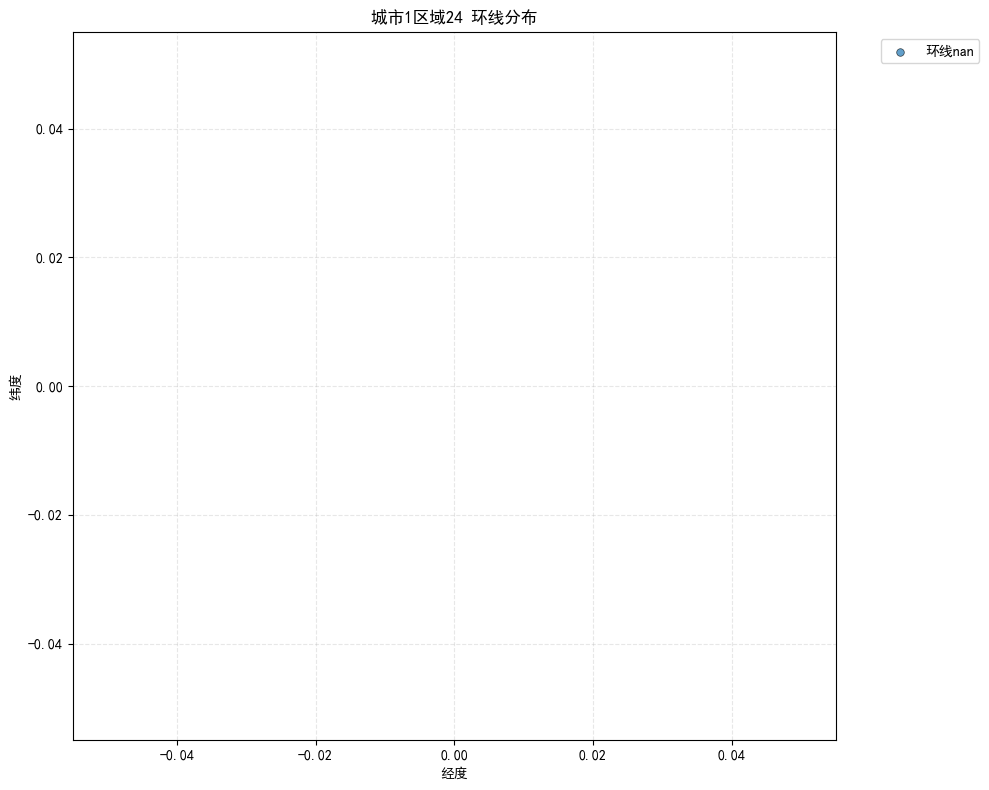

----- 处理区域24的板块 303 -----
板块样本数：1202
板块环线分布：[np.float64(nan)]


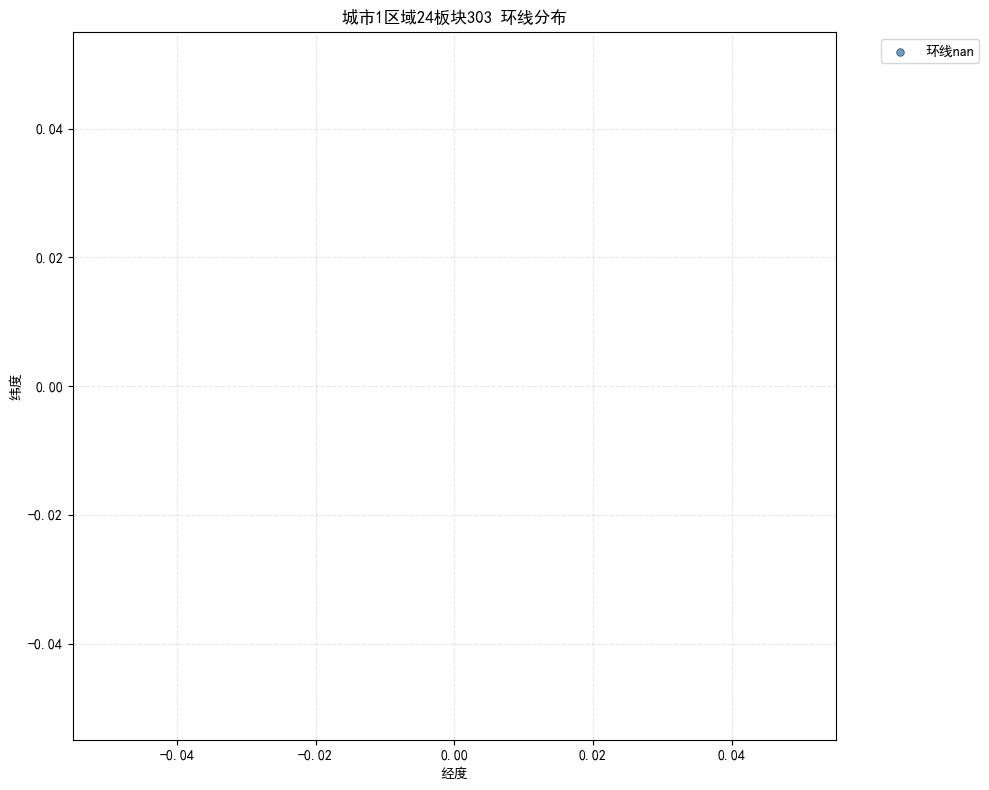


===== 处理城市 2 =====
样本总数：24996
已知环线样本：10429
需填充样本：14567


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


填充后有效样本数：24996（完成率：100.00%）


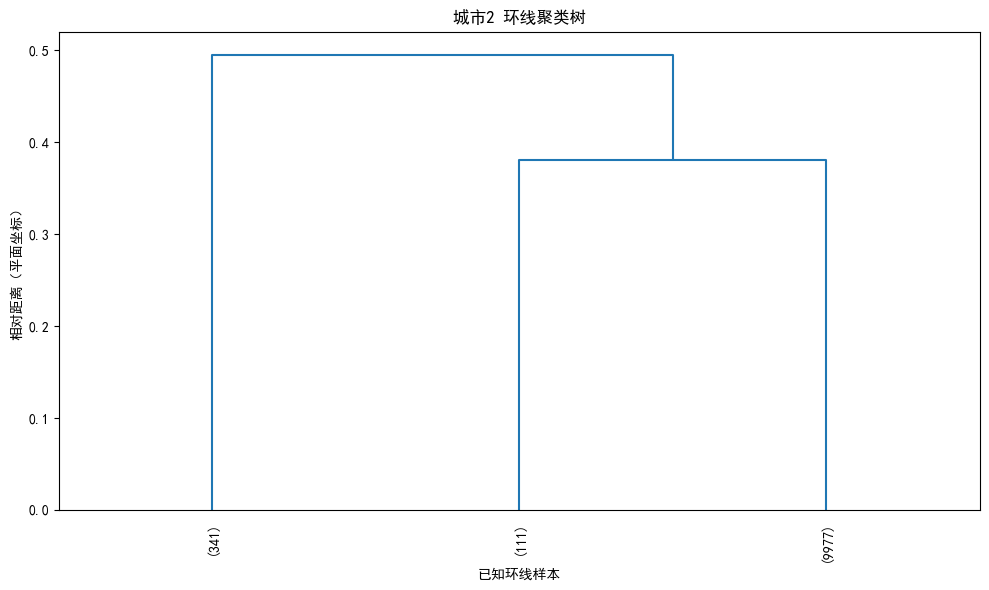

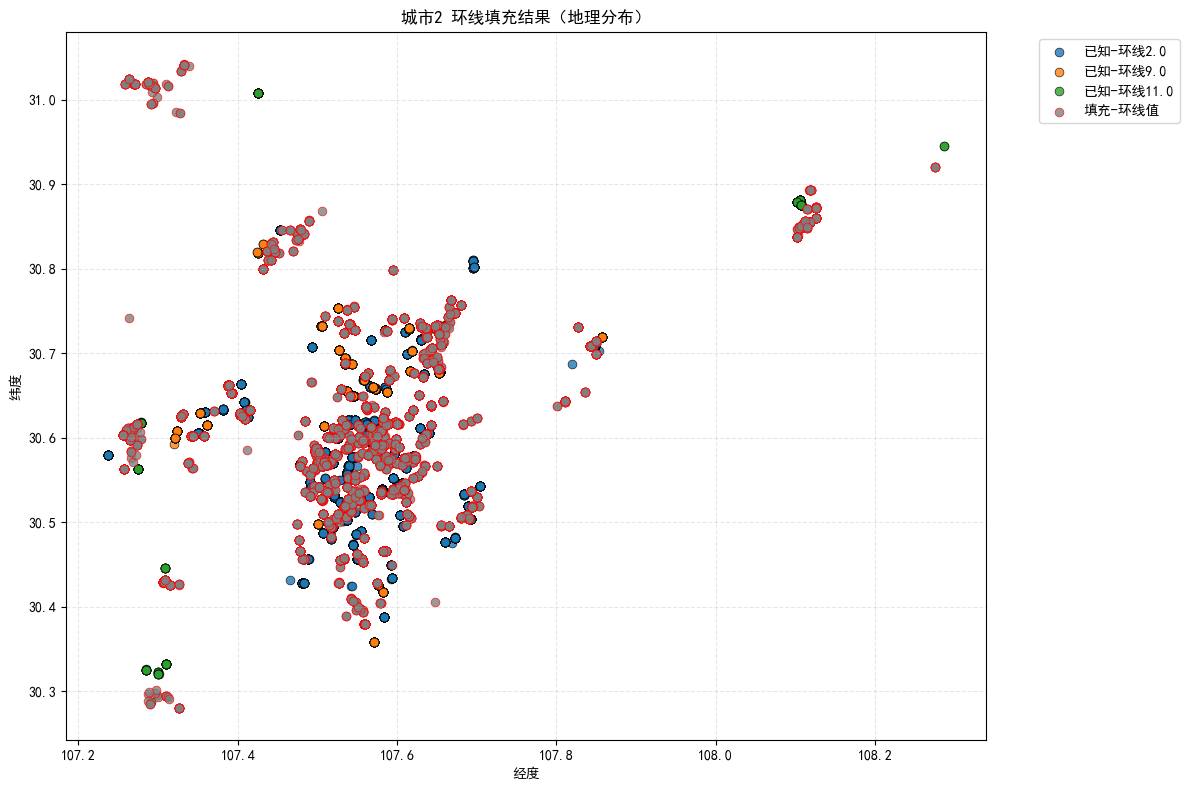


----- 处理城市2的区域 9 -----
区域样本数：1735
区域环线分布：[np.float64(2.0), np.float64(9.0)]


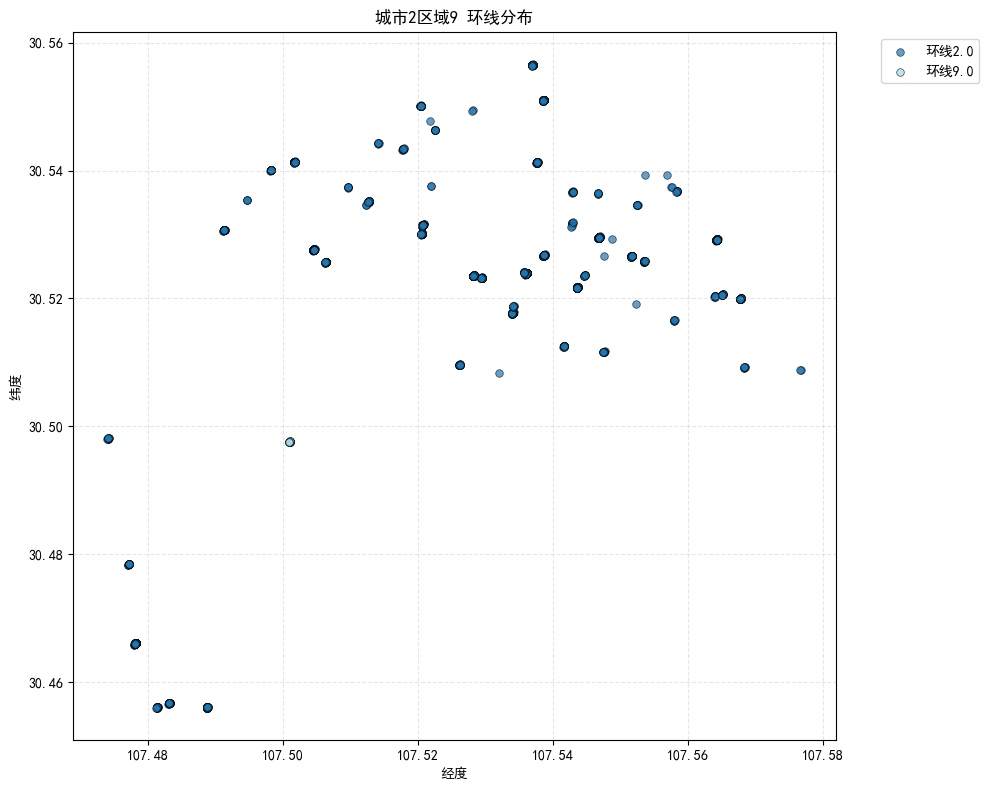

----- 处理区域9的板块 106 -----
板块样本数：164
板块环线分布：[np.float64(2.0)]


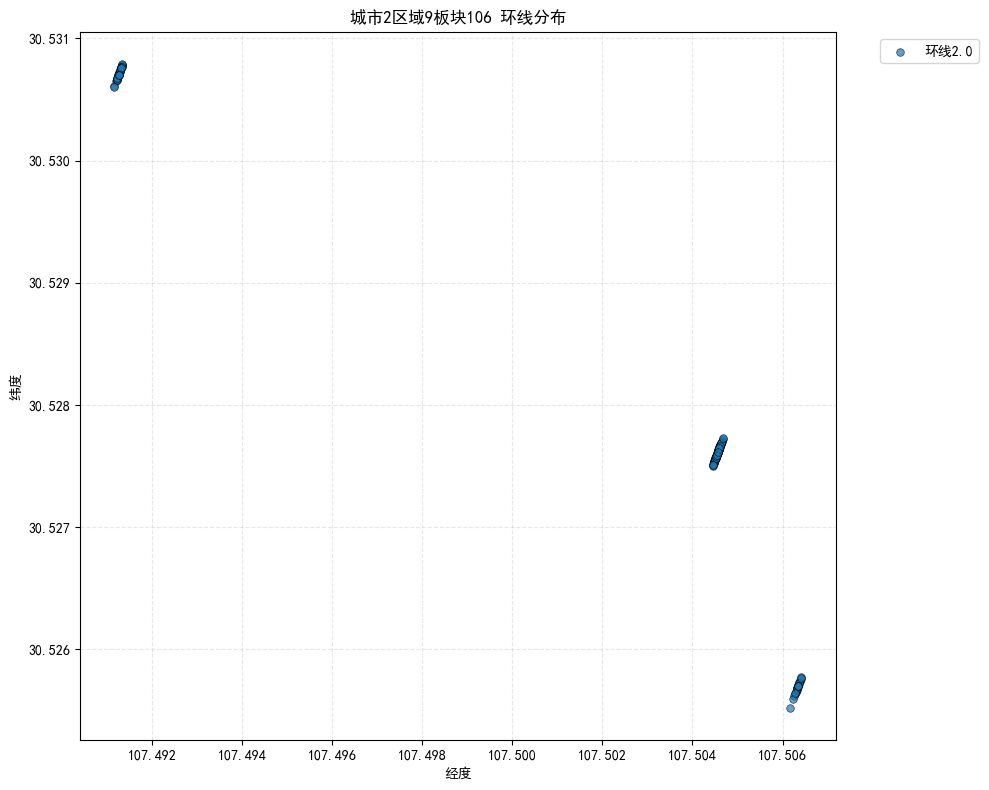


===== 处理城市 3 =====
样本总数：21472
已知环线样本：10708
需填充样本：10764


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


填充后有效样本数：21472（完成率：100.00%）


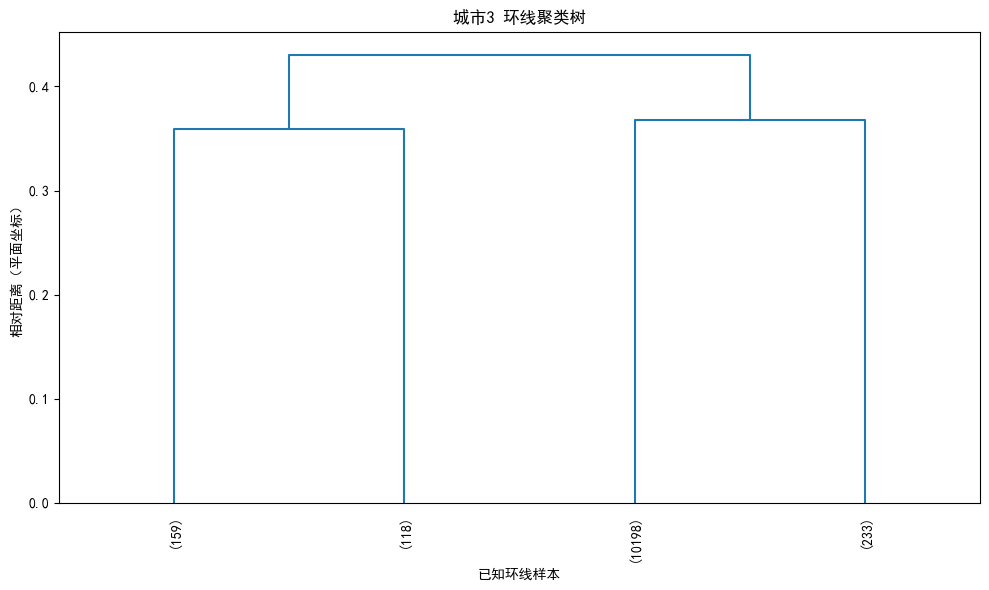

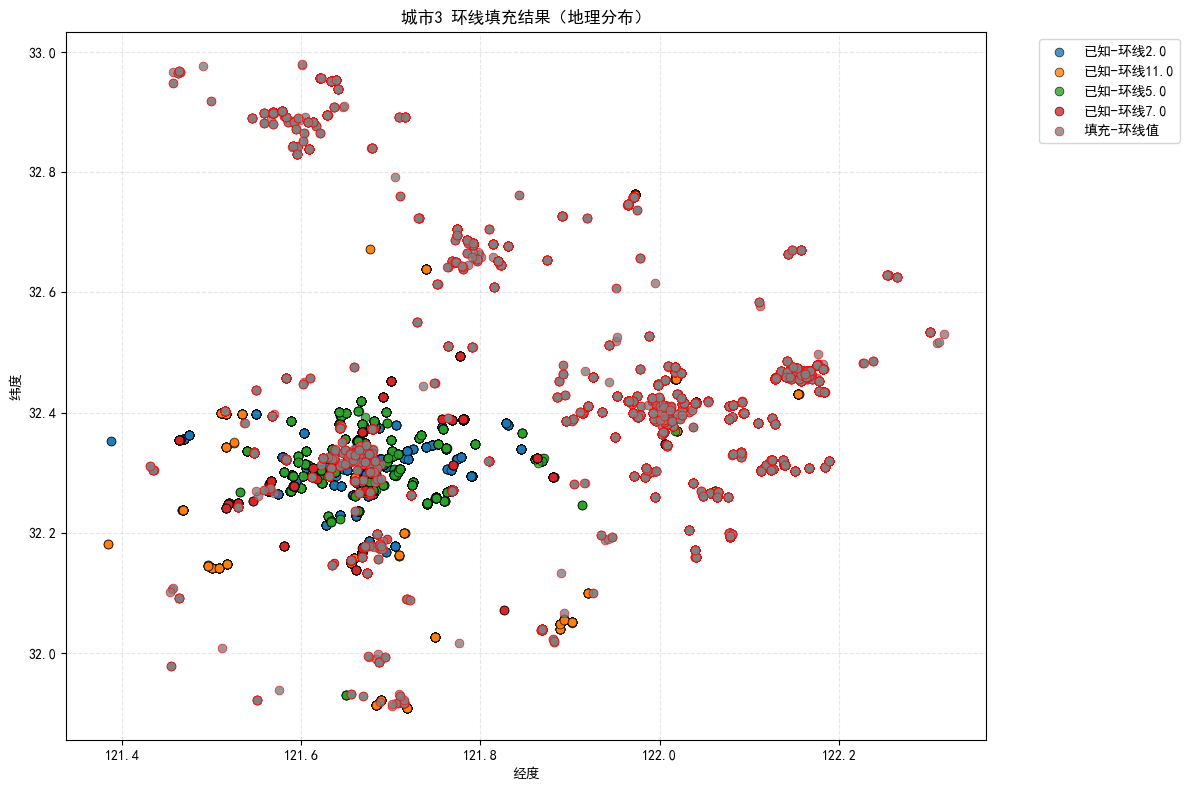


----- 处理城市3的区域 20 -----
区域样本数：3095
区域环线分布：[np.float64(2.0), np.float64(5.0), np.float64(7.0), np.float64(11.0)]


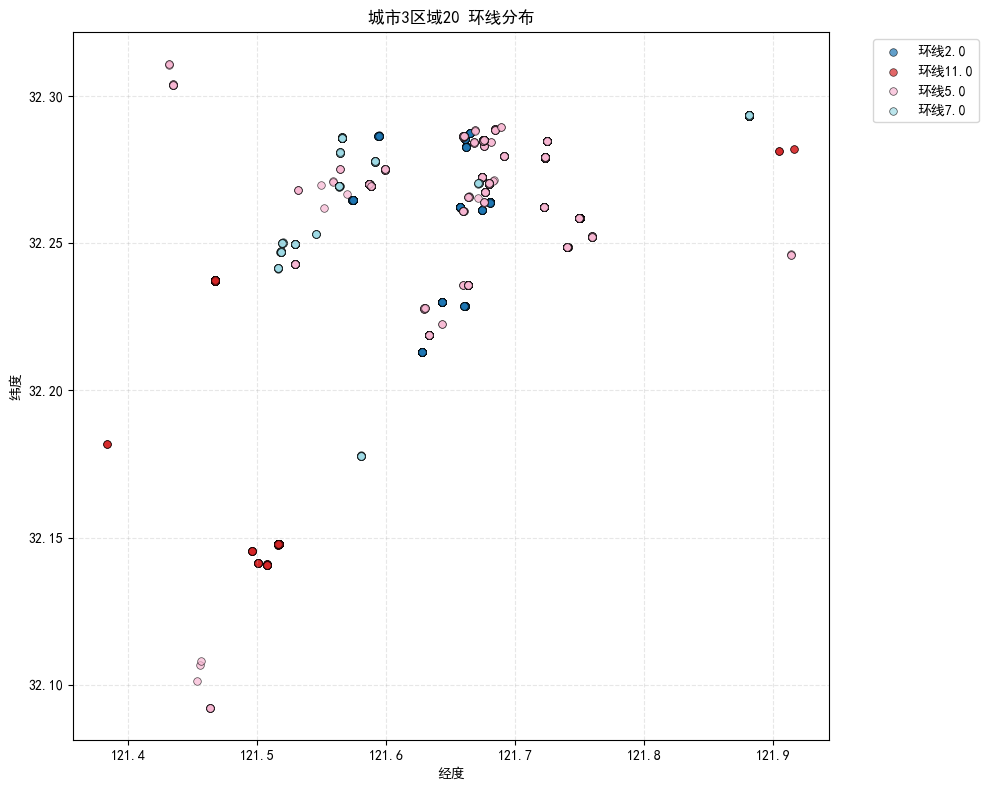

----- 处理区域20的板块 50 -----
板块样本数：10
板块环线分布：[np.float64(5.0)]


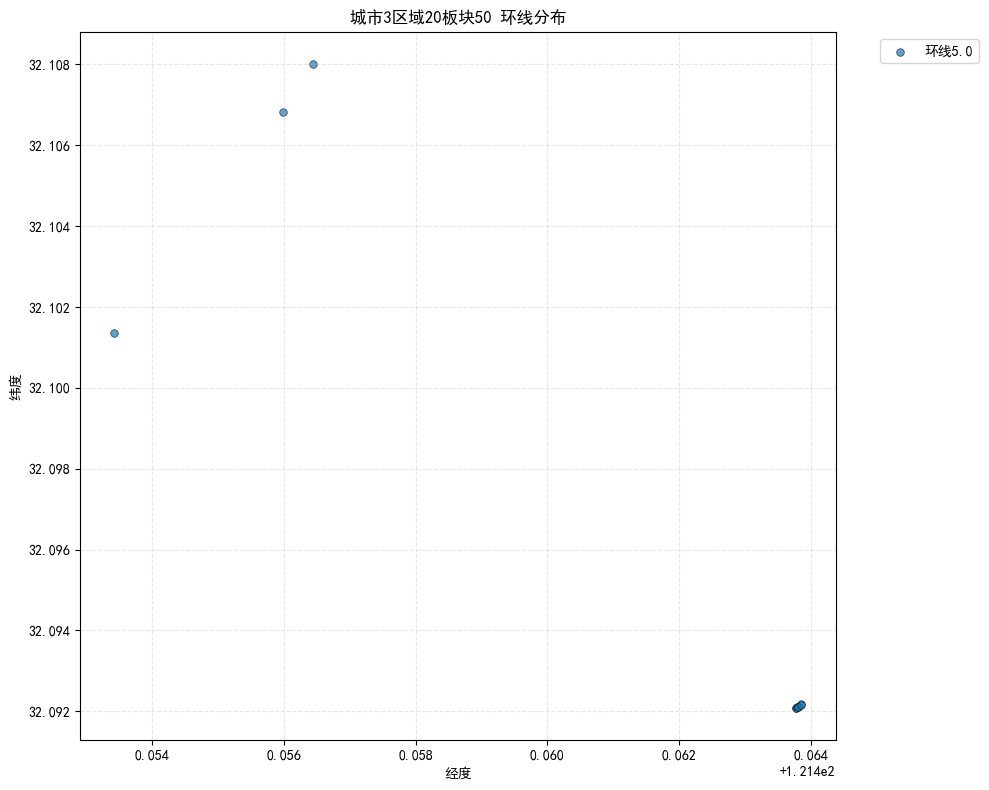


===== 处理城市 4 =====
样本总数：4363
已知环线样本：4093
需填充样本：270
填充后有效样本数：4363（完成率：100.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


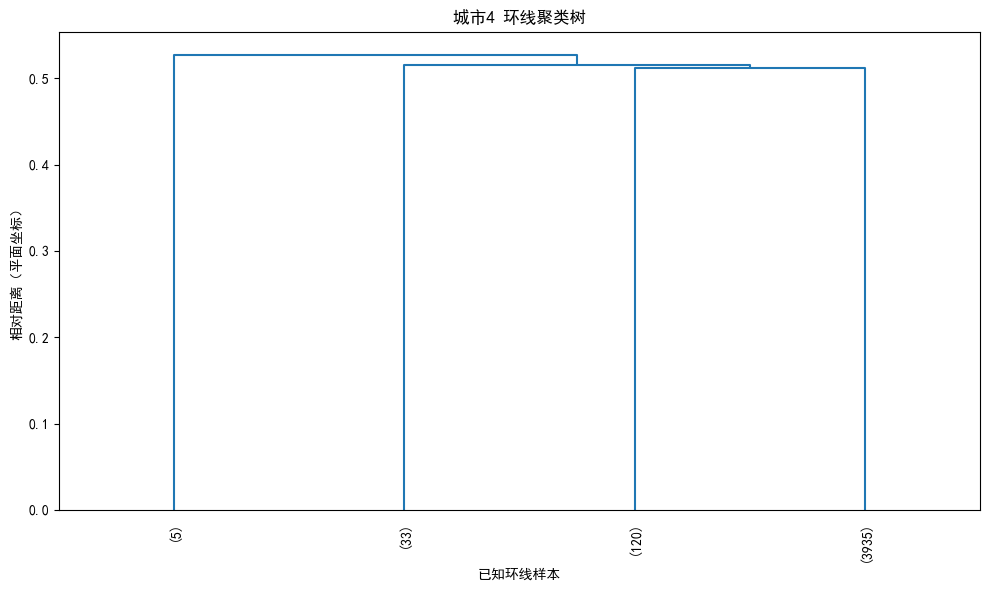

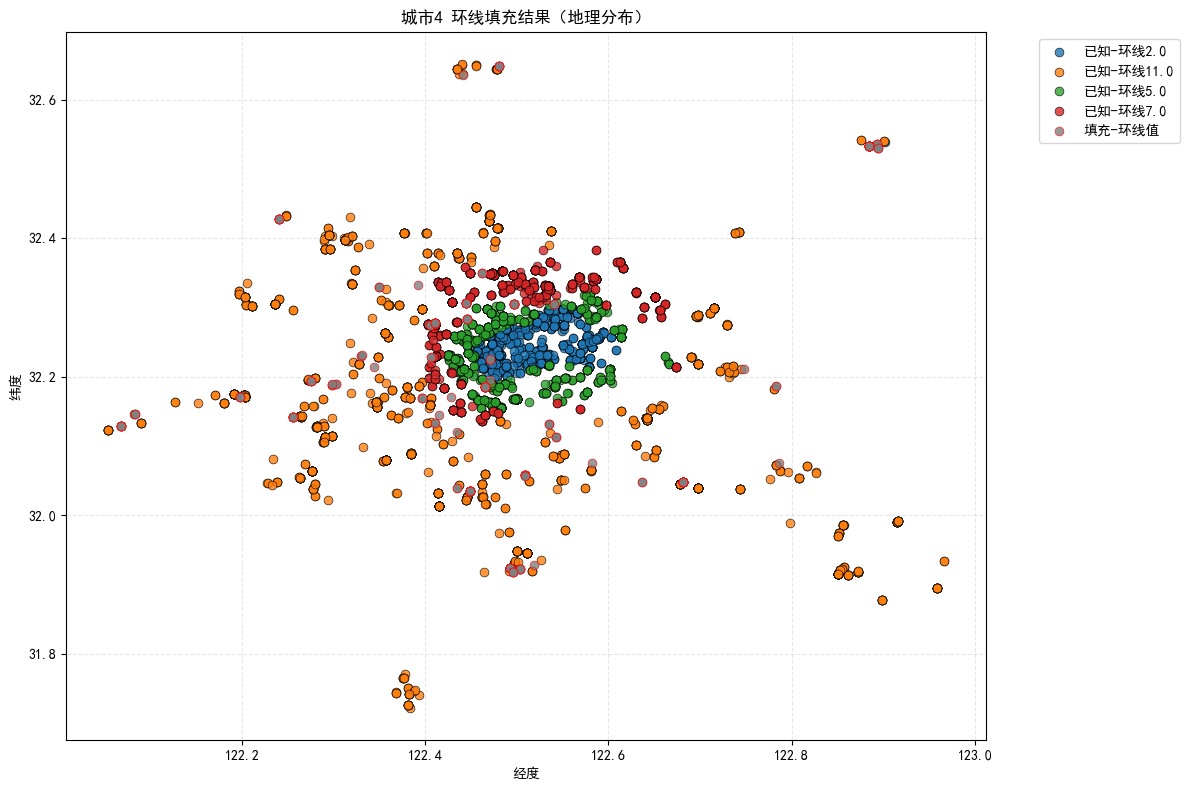


----- 处理城市4的区域 23 -----
区域样本数：259
区域环线分布：[np.float64(7.0), np.float64(11.0)]


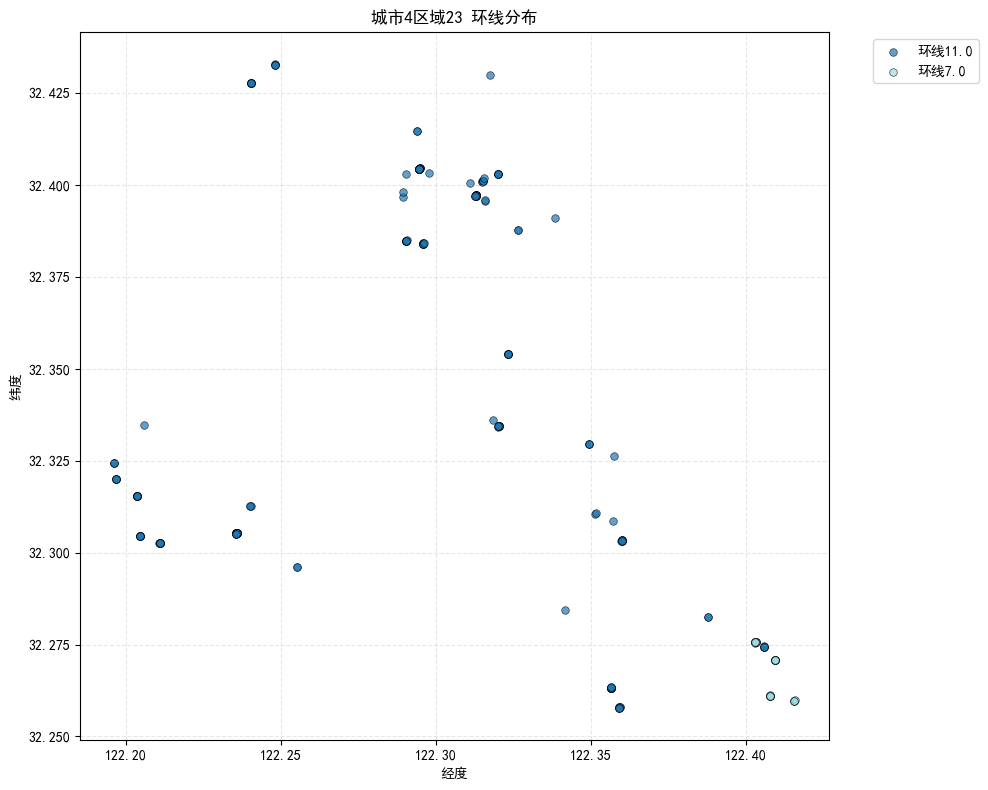

----- 处理区域23的板块 85 -----
板块样本数：37
板块环线分布：[np.float64(7.0), np.float64(11.0)]


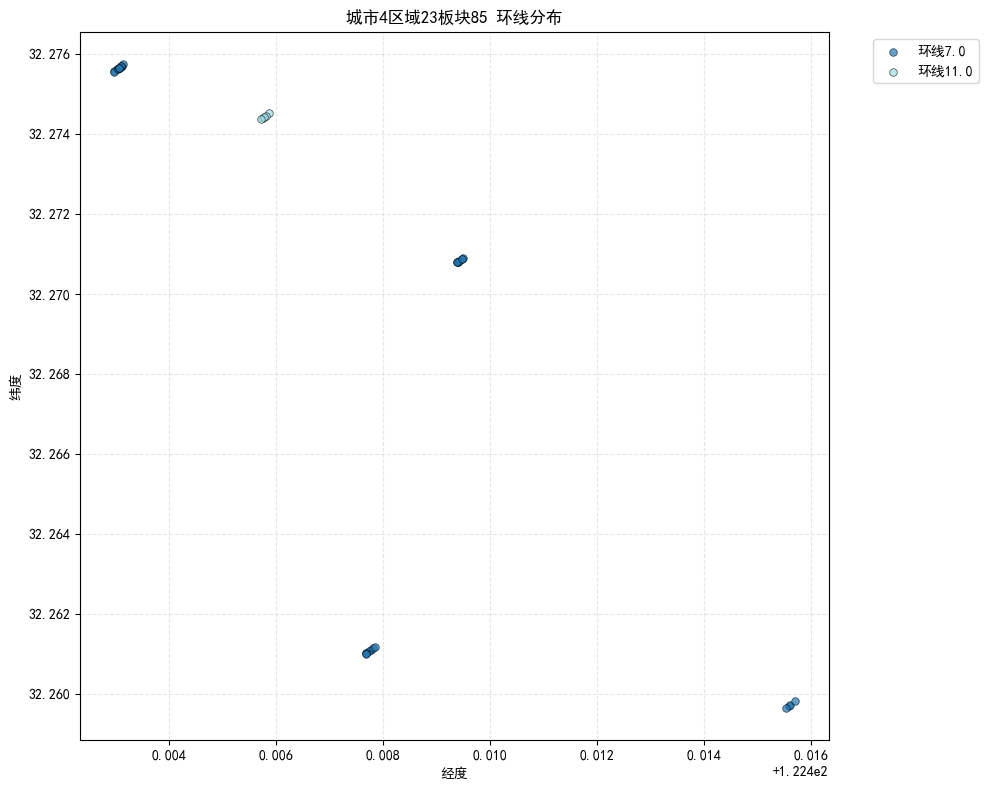


===== 处理城市 5 =====
样本总数：3582
已知环线样本：0
需填充样本：3582
警告：城市5无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


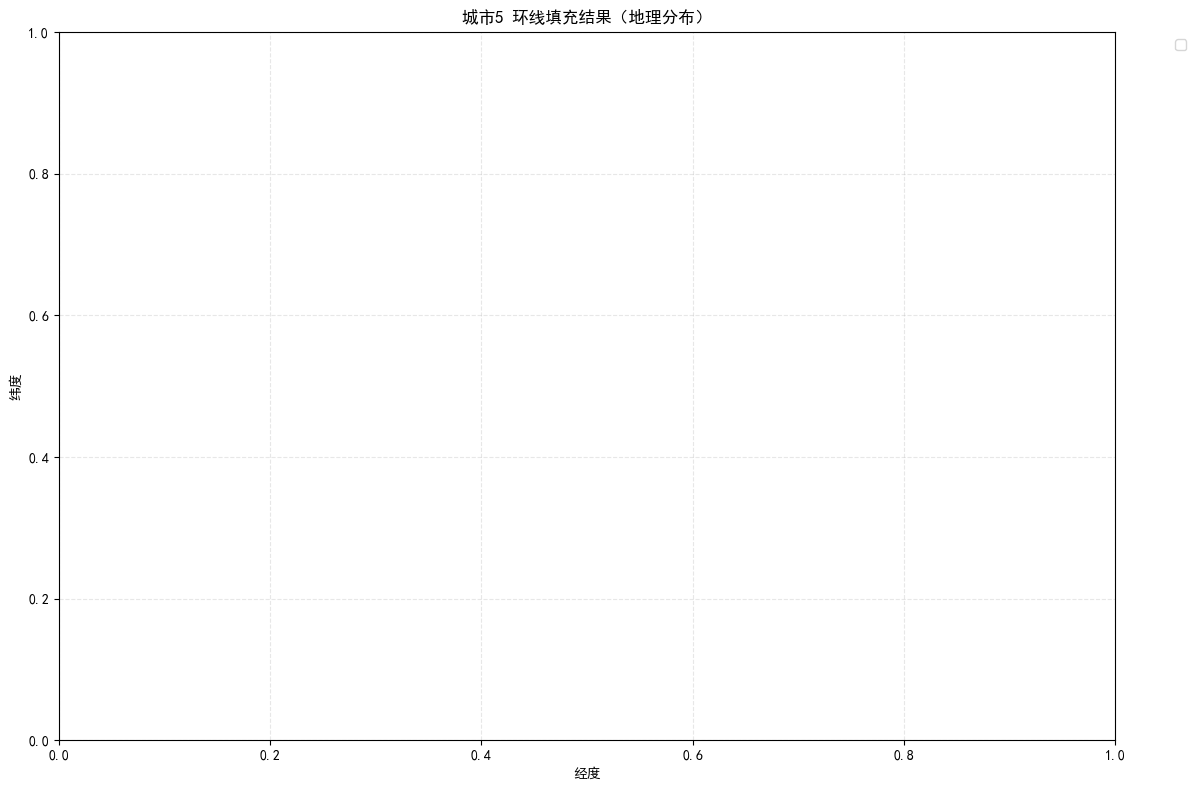


----- 处理城市5的区域 63 -----
区域样本数：743
区域环线分布：[np.float64(nan)]


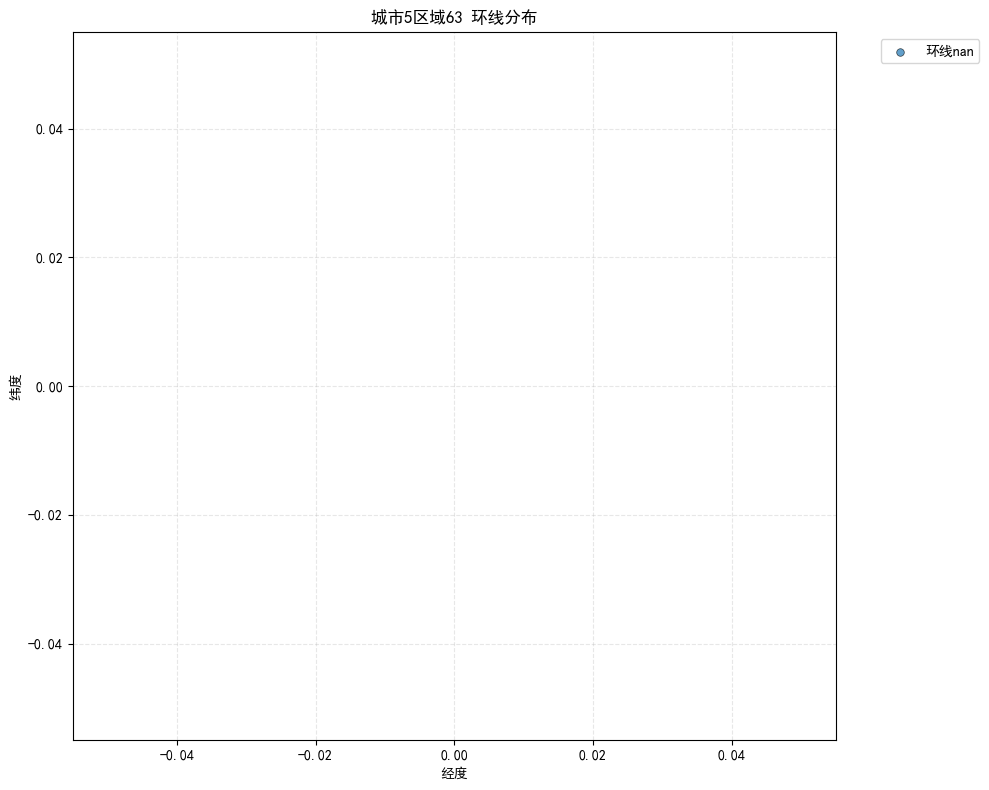

----- 处理区域63的板块 117 -----
板块样本数：461
板块环线分布：[np.float64(nan)]


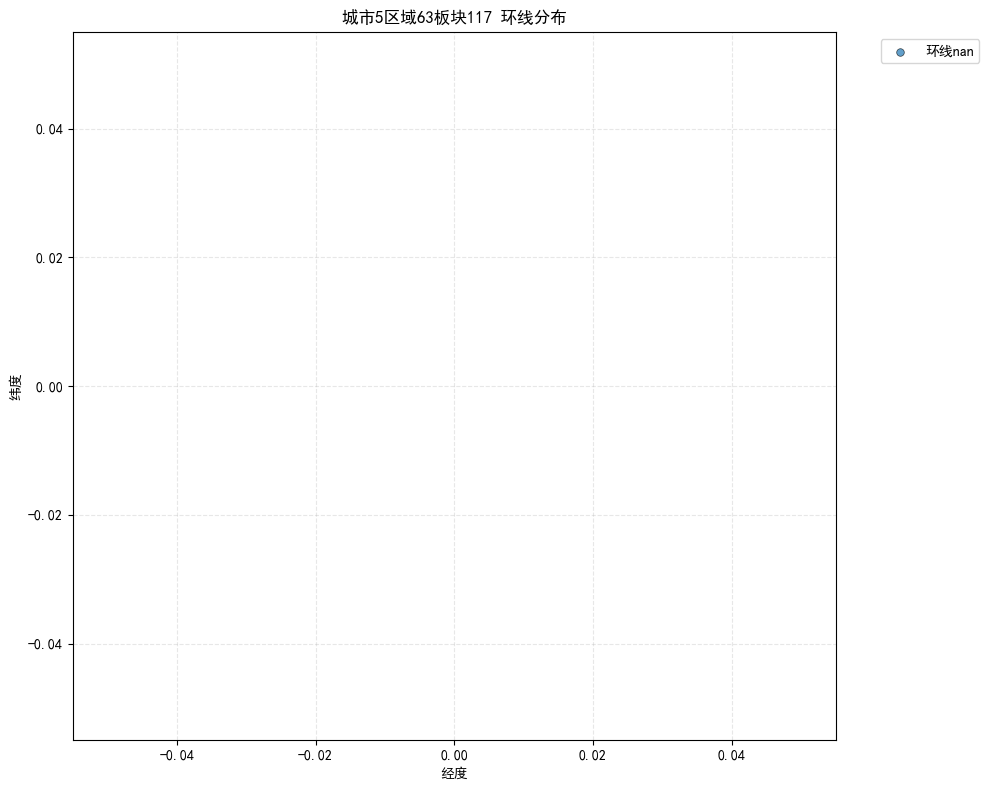


===== 处理城市 6 =====
样本总数：2281
已知环线样本：0
需填充样本：2281
警告：城市6无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


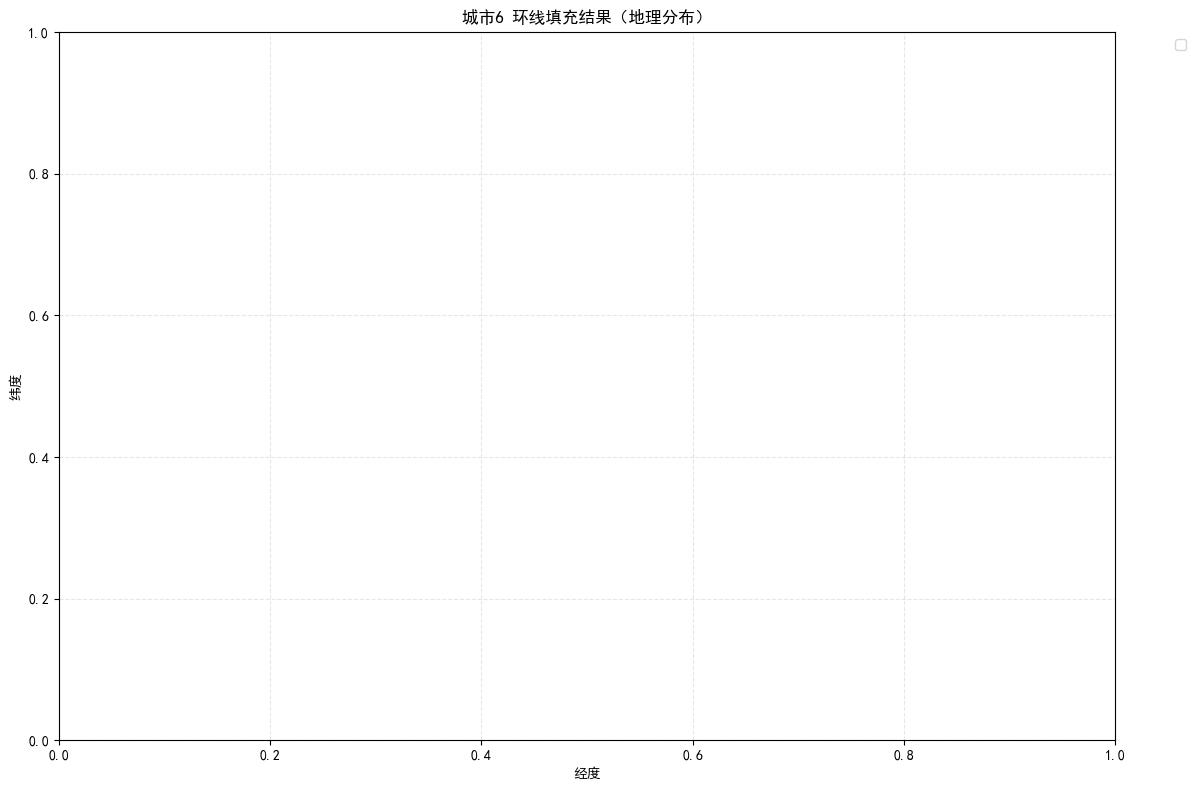


----- 处理城市6的区域 3 -----
区域样本数：76
区域环线分布：[np.float64(nan)]


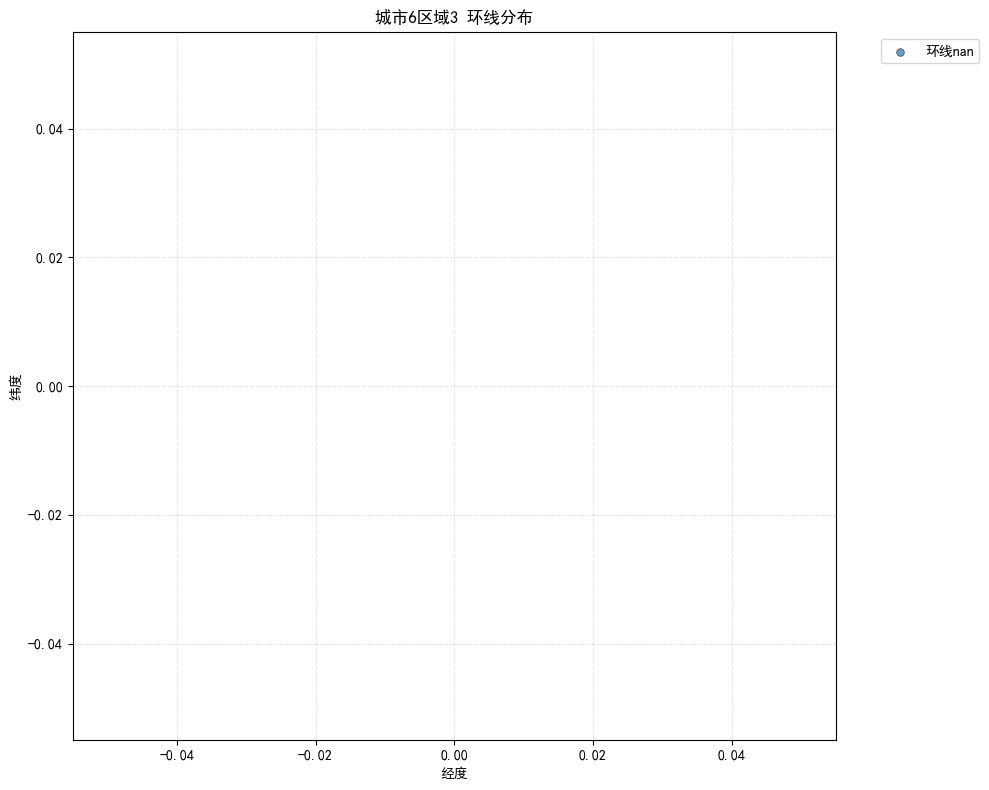

----- 处理区域3的板块 35 -----
板块样本数：76
板块环线分布：[np.float64(nan)]


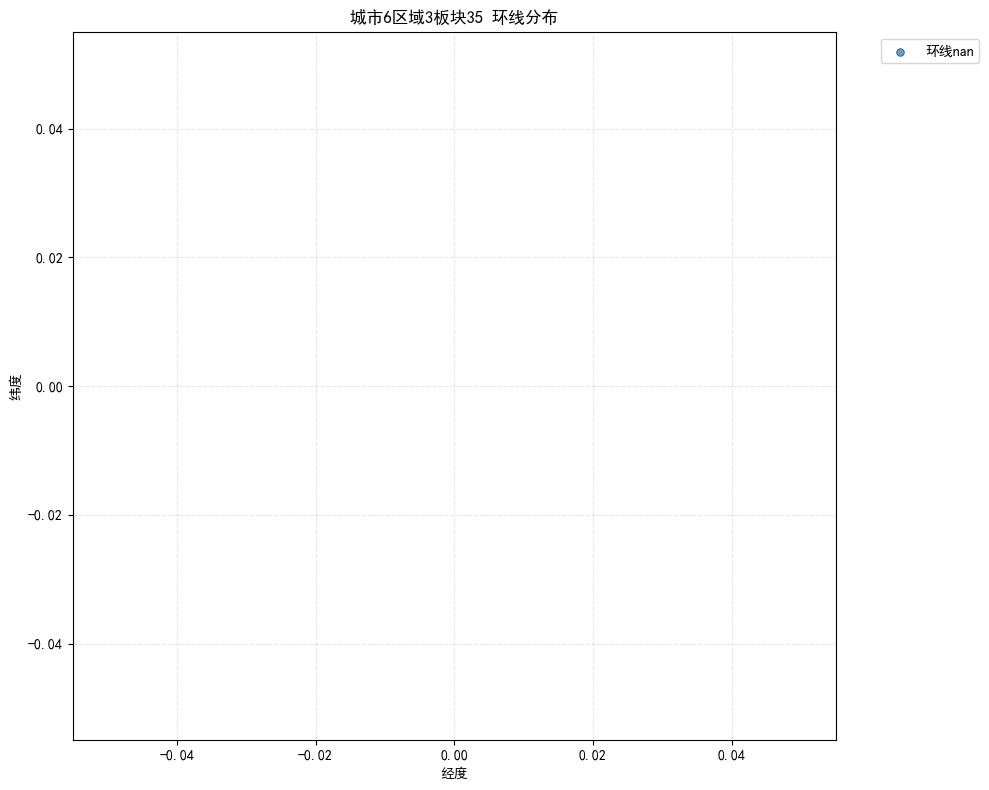


===== 处理城市 7 =====
样本总数：1184
已知环线样本：88
需填充样本：1096
填充后有效样本数：1184（完成率：100.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])


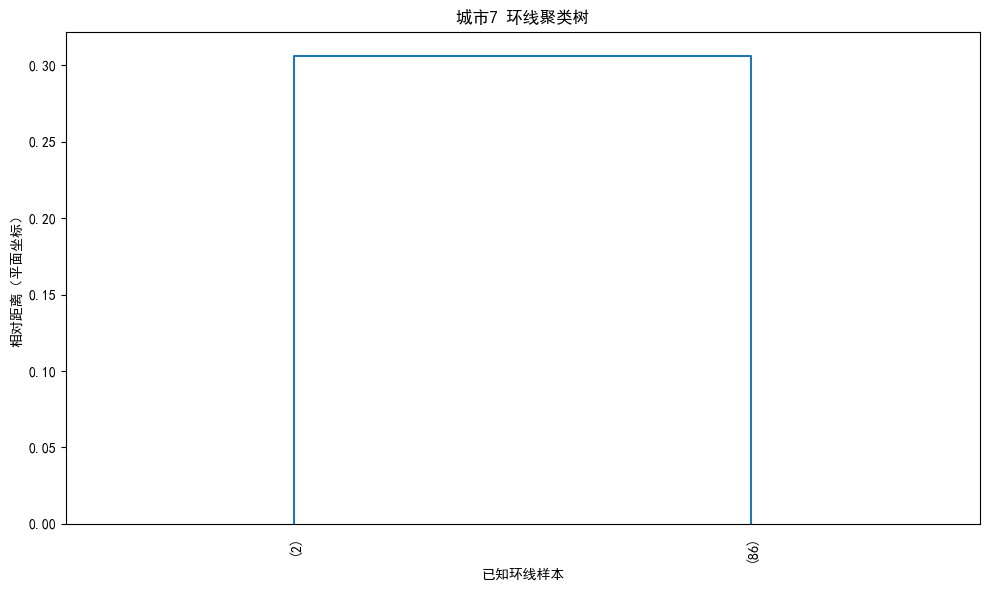

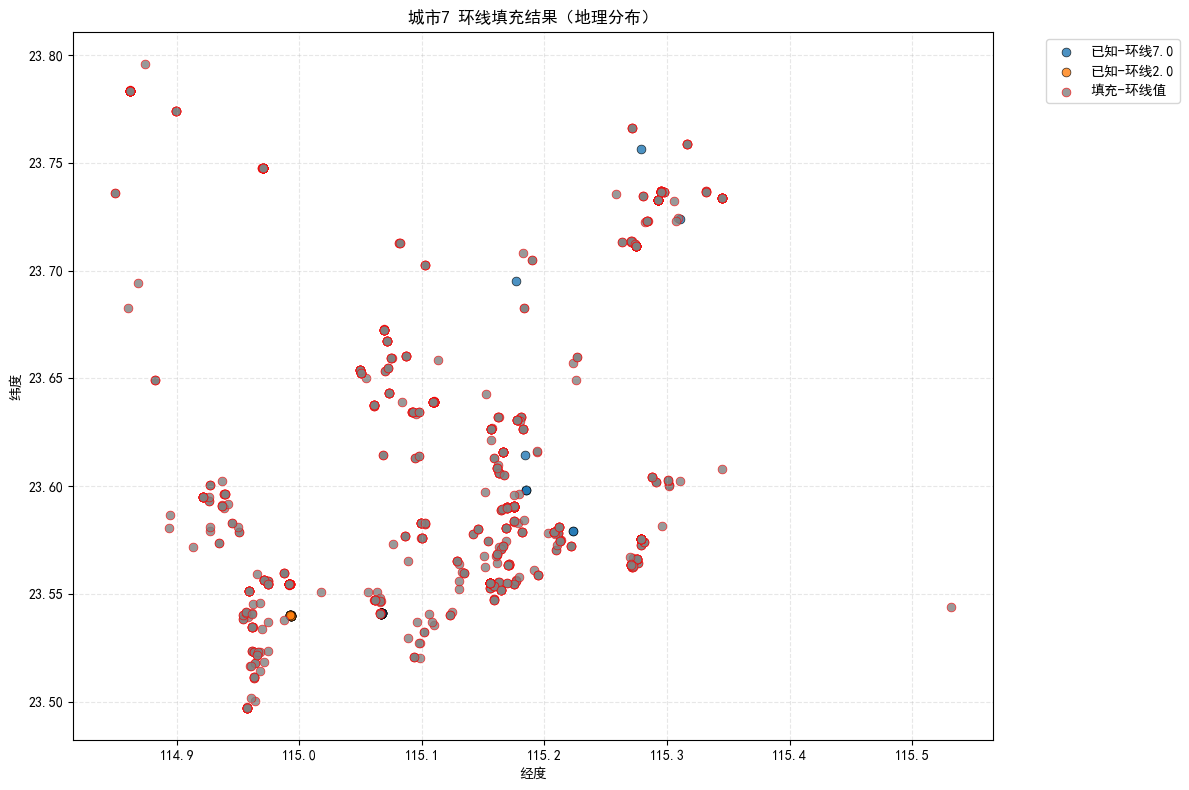


----- 处理城市7的区域 13 -----
区域样本数：53
区域环线分布：[np.float64(7.0)]


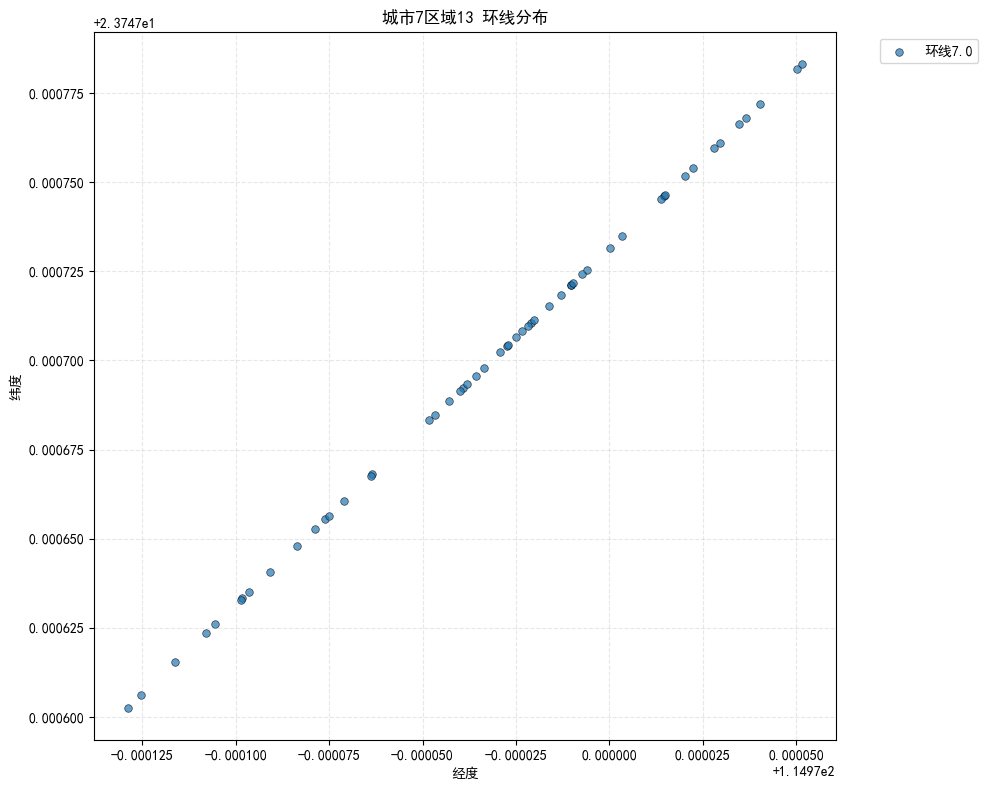

----- 处理区域13的板块 140 -----
板块样本数：7
板块环线分布：[np.float64(7.0)]


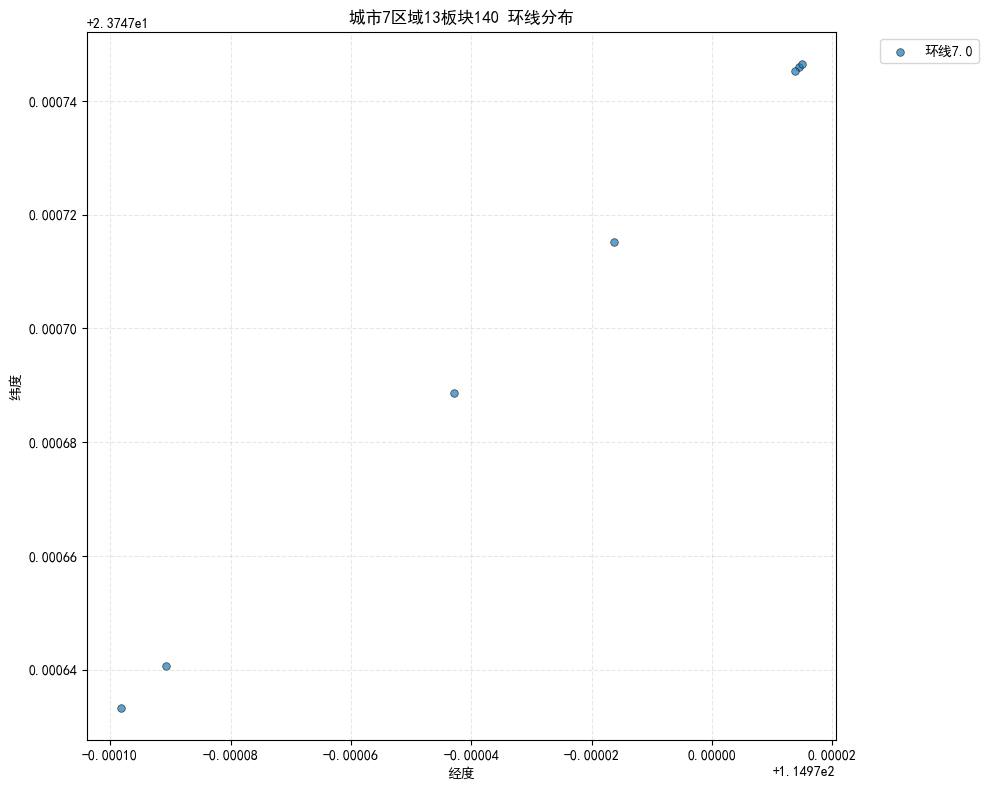


===== 处理城市 8 =====
样本总数：5931
已知环线样本：0
需填充样本：5931
警告：城市8无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


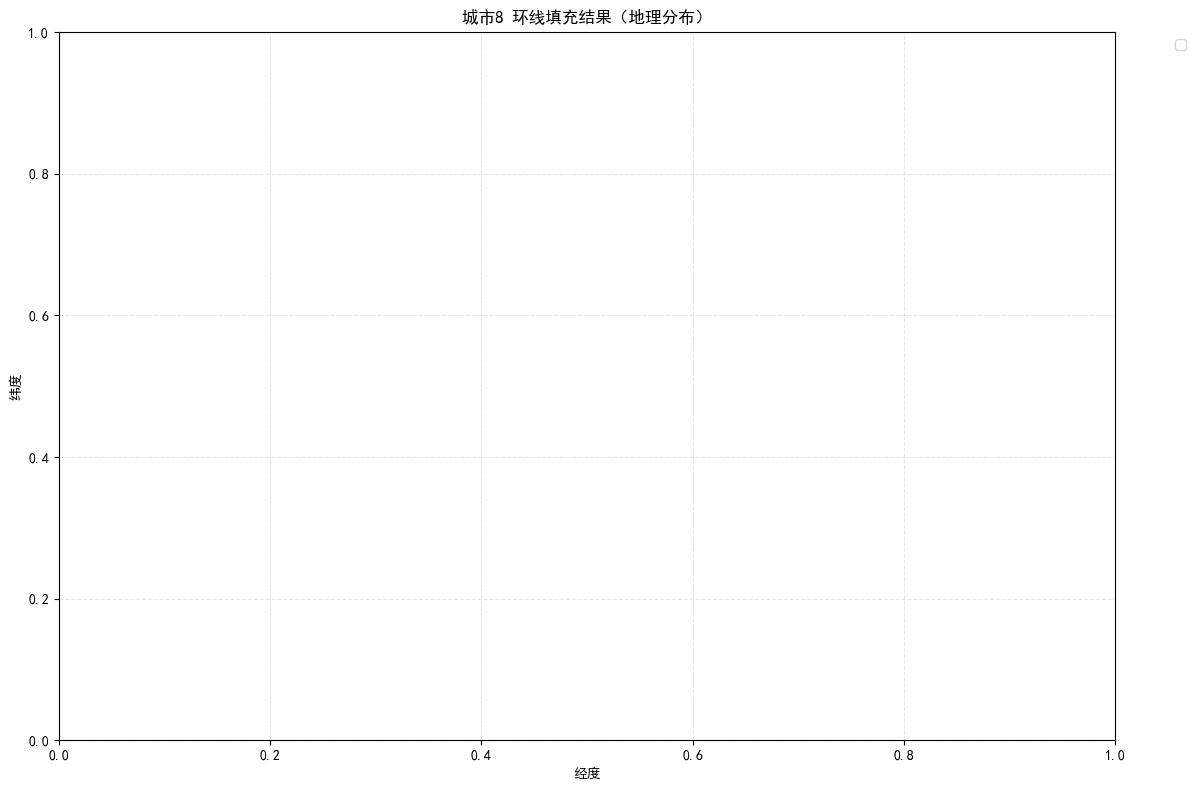


----- 处理城市8的区域 10 -----
区域样本数：1039
区域环线分布：[np.float64(nan)]


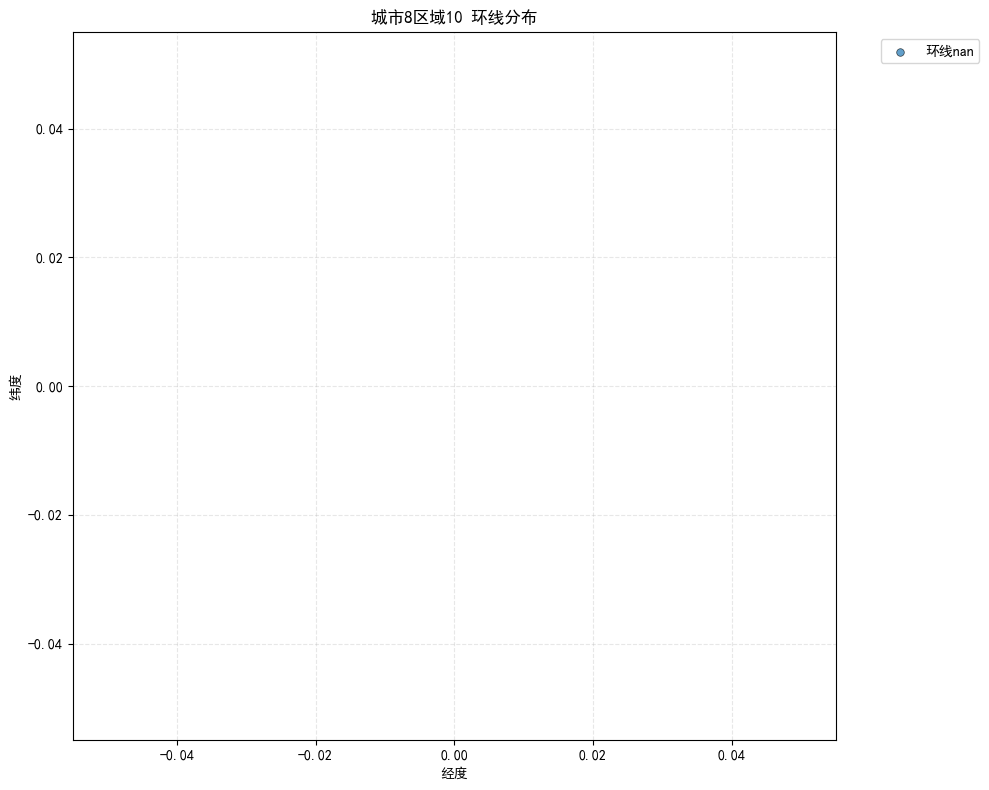

----- 处理区域10的板块 84 -----
板块样本数：64
板块环线分布：[np.float64(nan)]


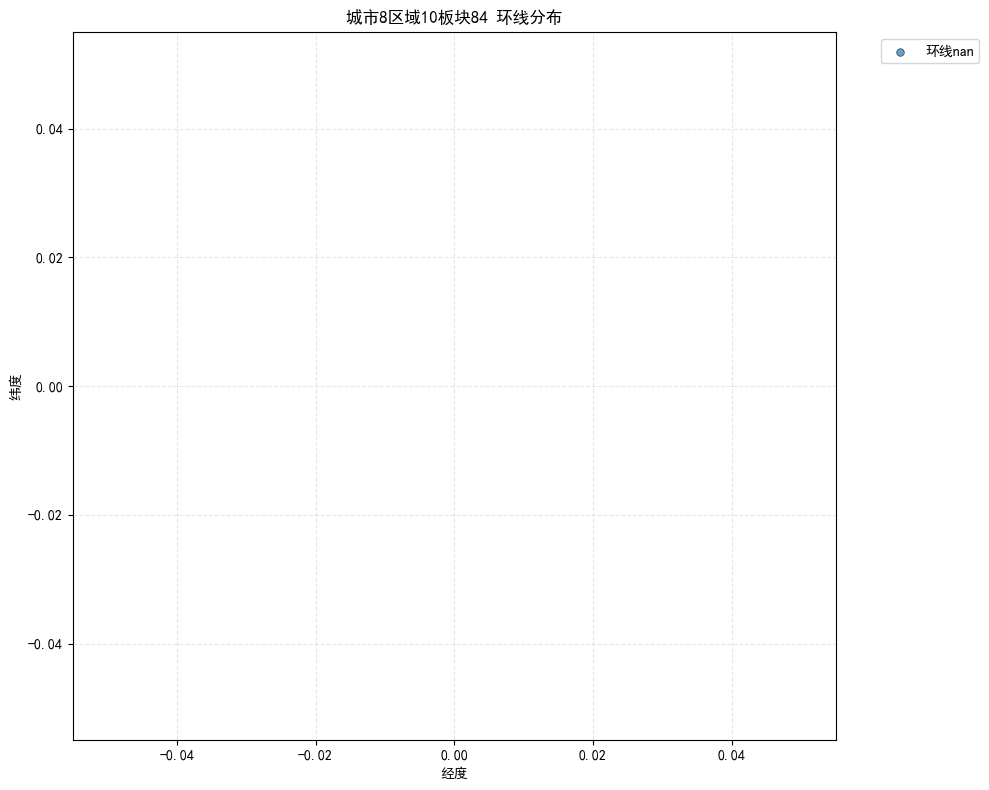


===== 处理城市 9 =====
样本总数：1323
已知环线样本：0
需填充样本：1323
警告：城市9无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


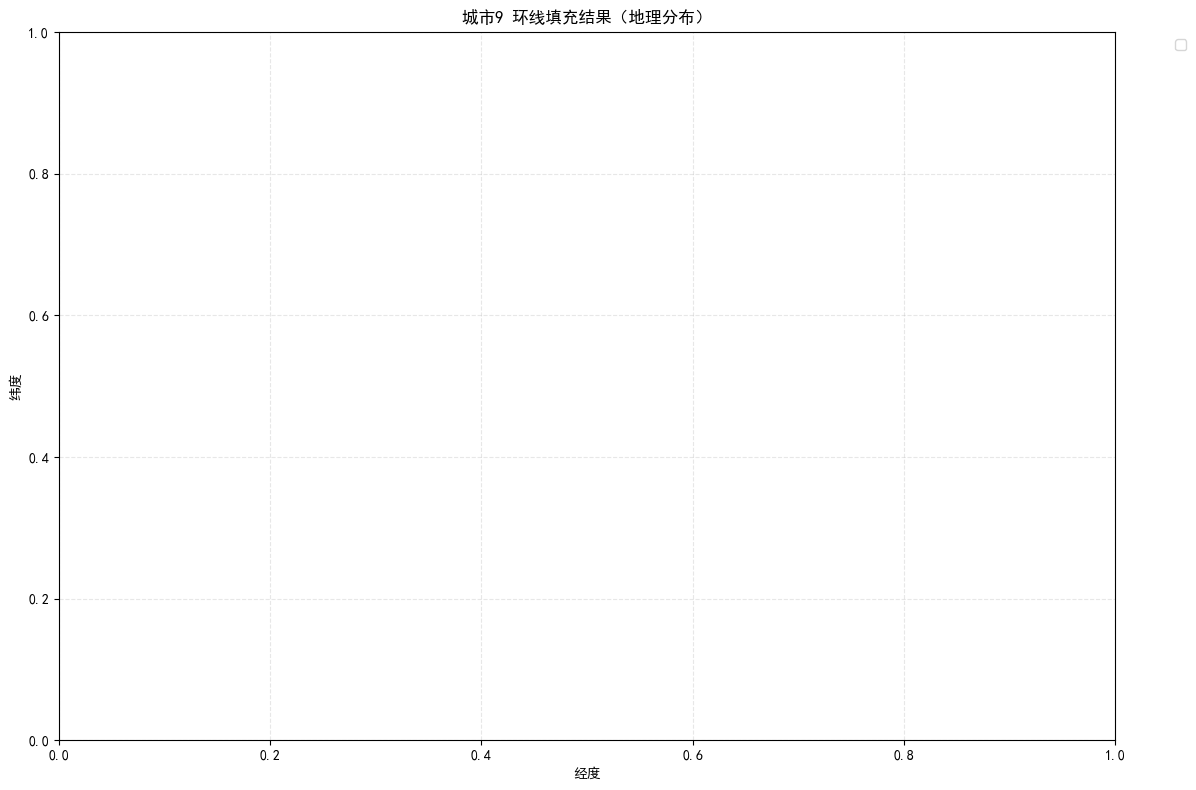


----- 处理城市9的区域 4 -----
区域样本数：501
区域环线分布：[np.float64(nan)]


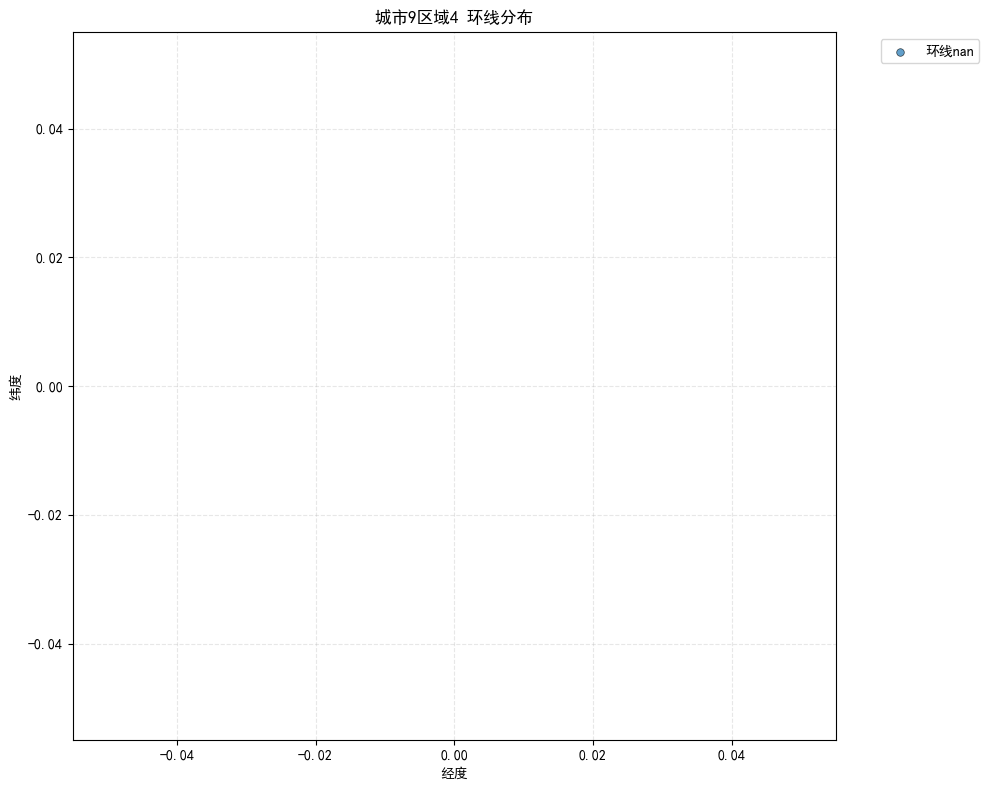

----- 处理区域4的板块 40 -----
板块样本数：485
板块环线分布：[np.float64(nan)]


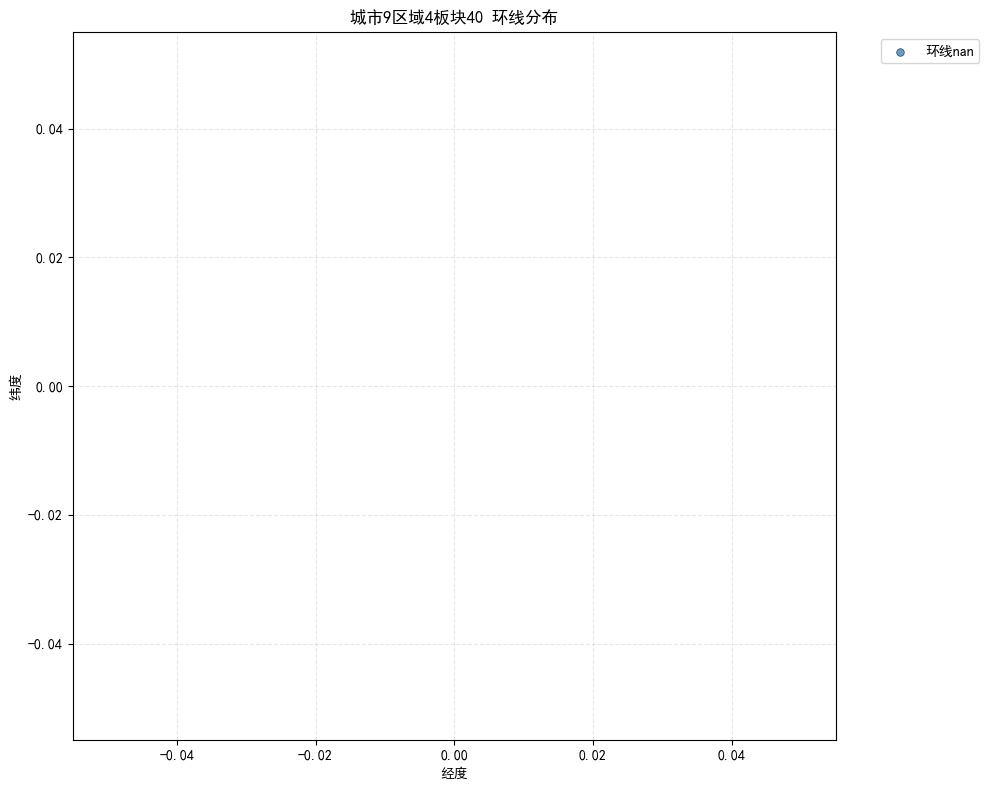


===== 处理城市 10 =====
样本总数：15057
已知环线样本：0
需填充样本：15057
警告：城市10无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


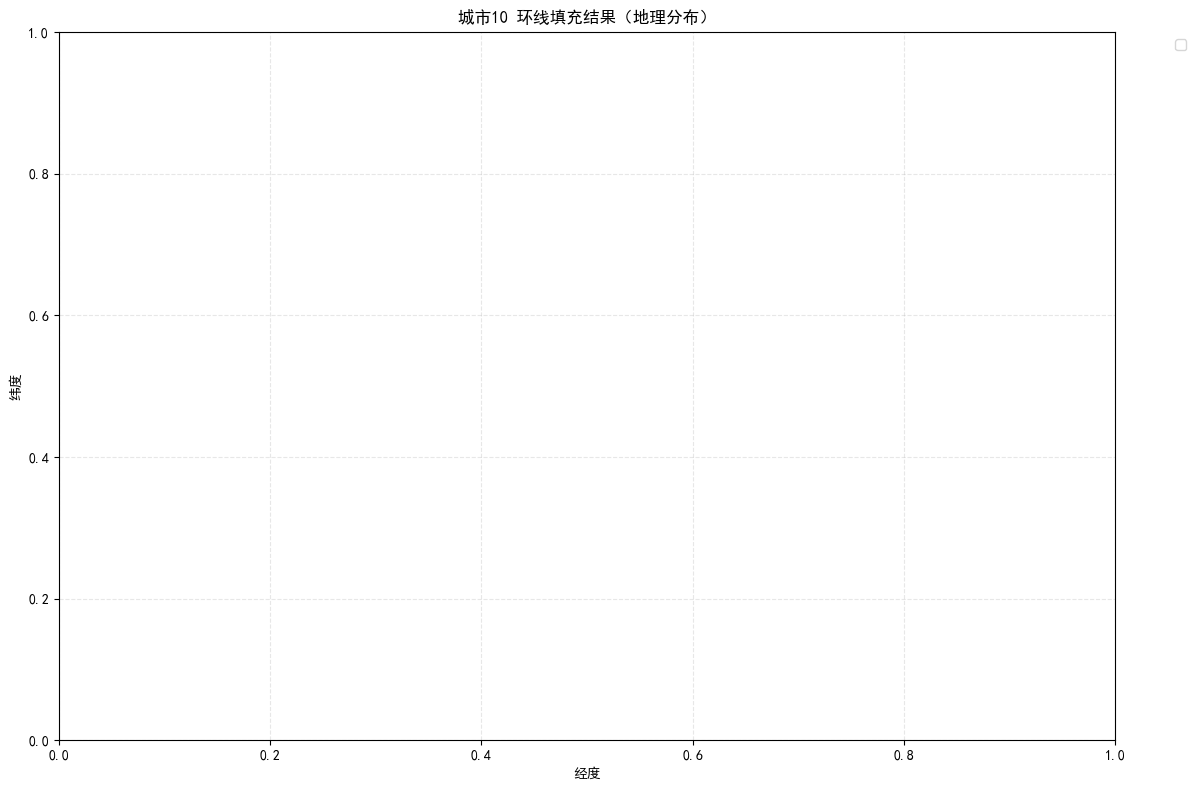


----- 处理城市10的区域 12 -----
区域样本数：330
区域环线分布：[np.float64(nan)]


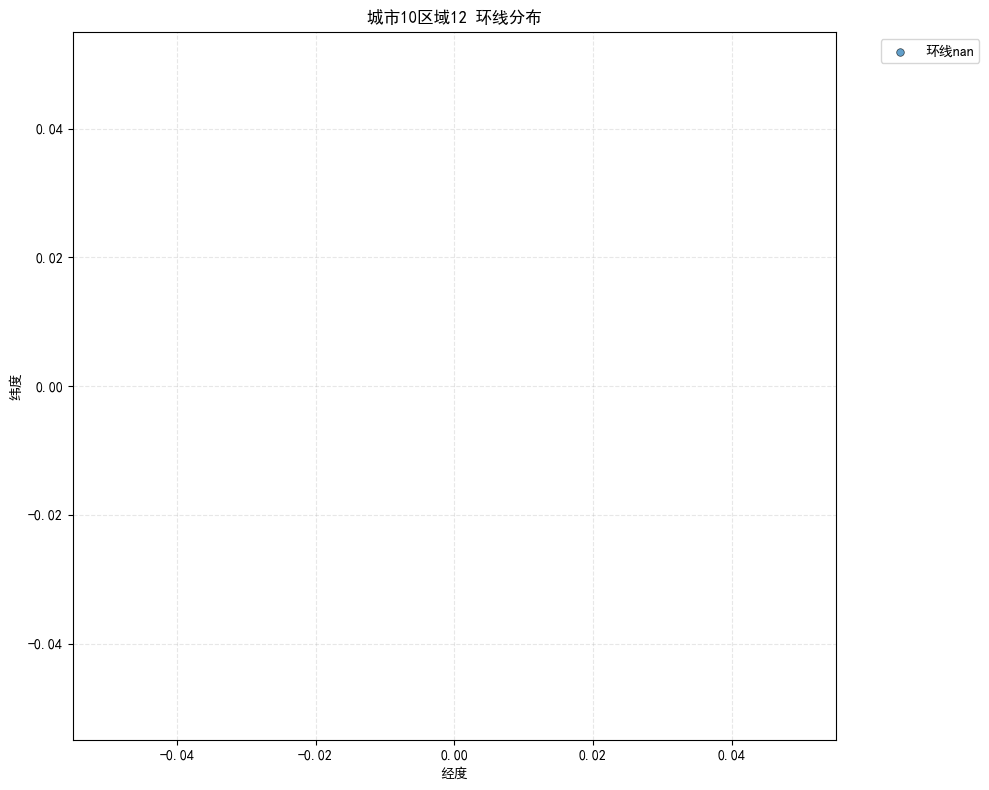

----- 处理区域12的板块 385 -----
板块样本数：247
板块环线分布：[np.float64(nan)]


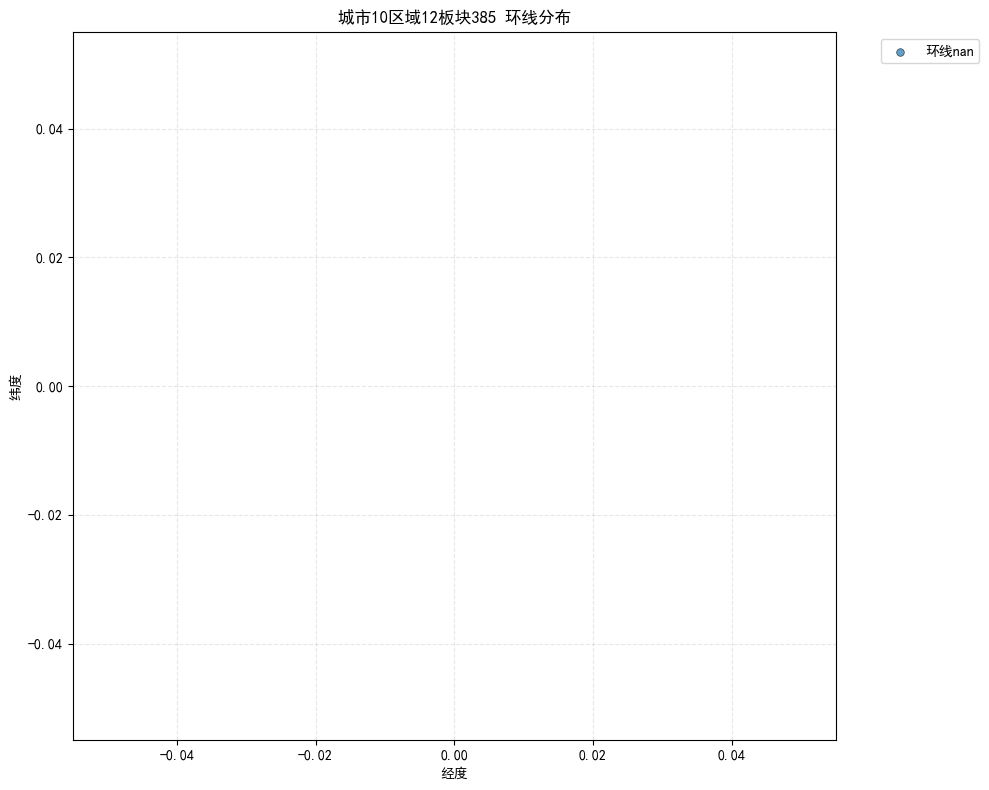


===== 处理城市 11 =====
样本总数：754
已知环线样本：0
需填充样本：754
警告：城市11无已知环线数据，无法填充
填充后有效样本数：0（完成率：0.00%）


C:\Users\杨\AppData\Local\Temp\ipykernel_26856\1628880761.py:142: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


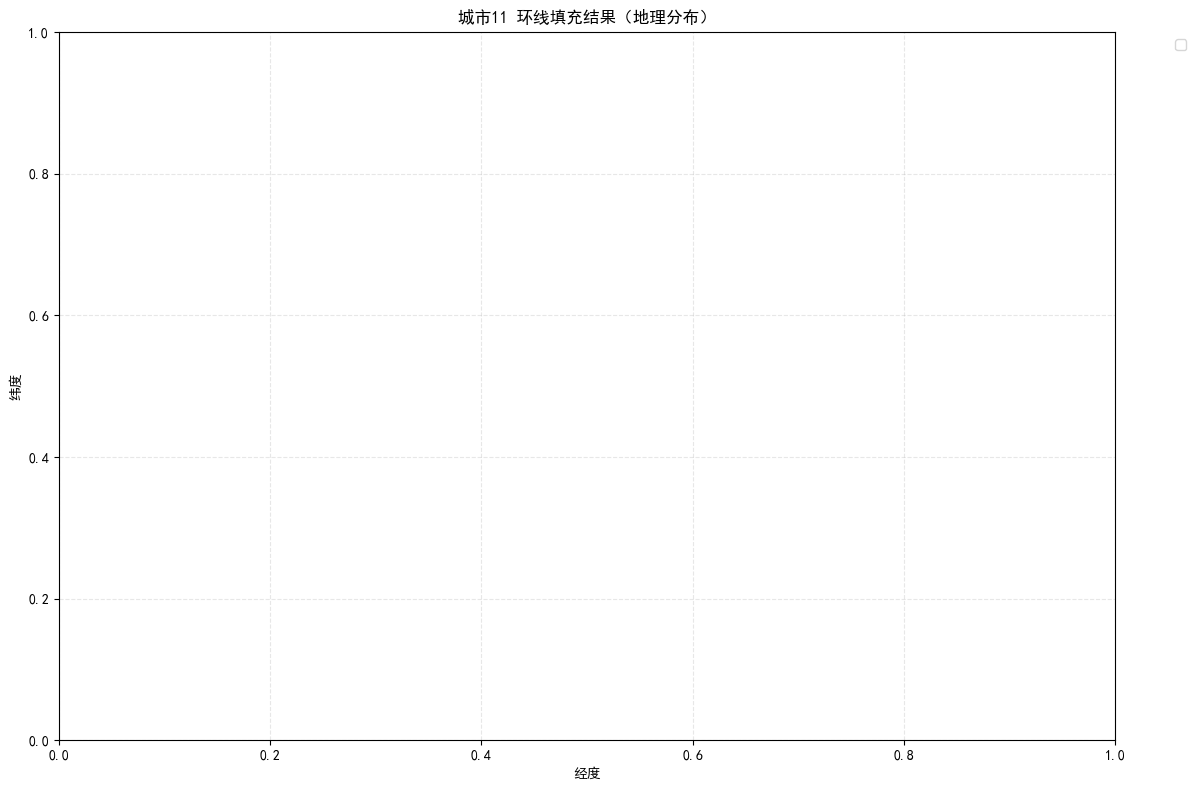


----- 处理城市11的区域 39 -----
区域样本数：1
区域环线分布：[np.float64(nan)]


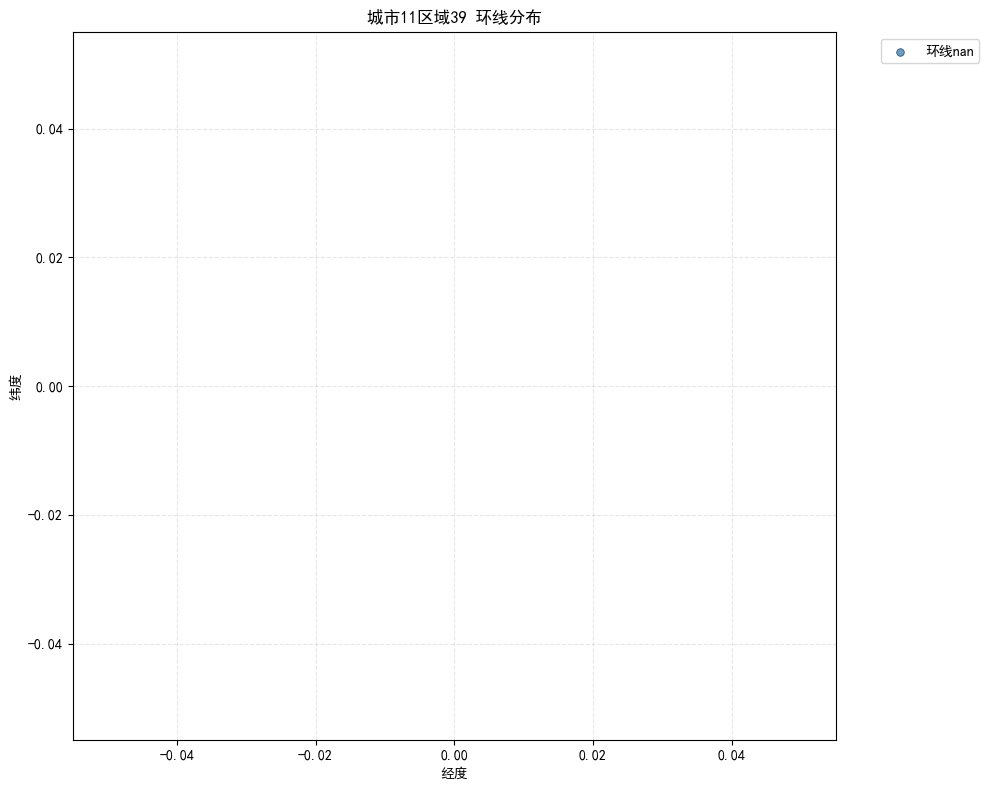

----- 处理区域39的板块 405 -----
板块样本数：1
板块环线分布：[np.float64(nan)]


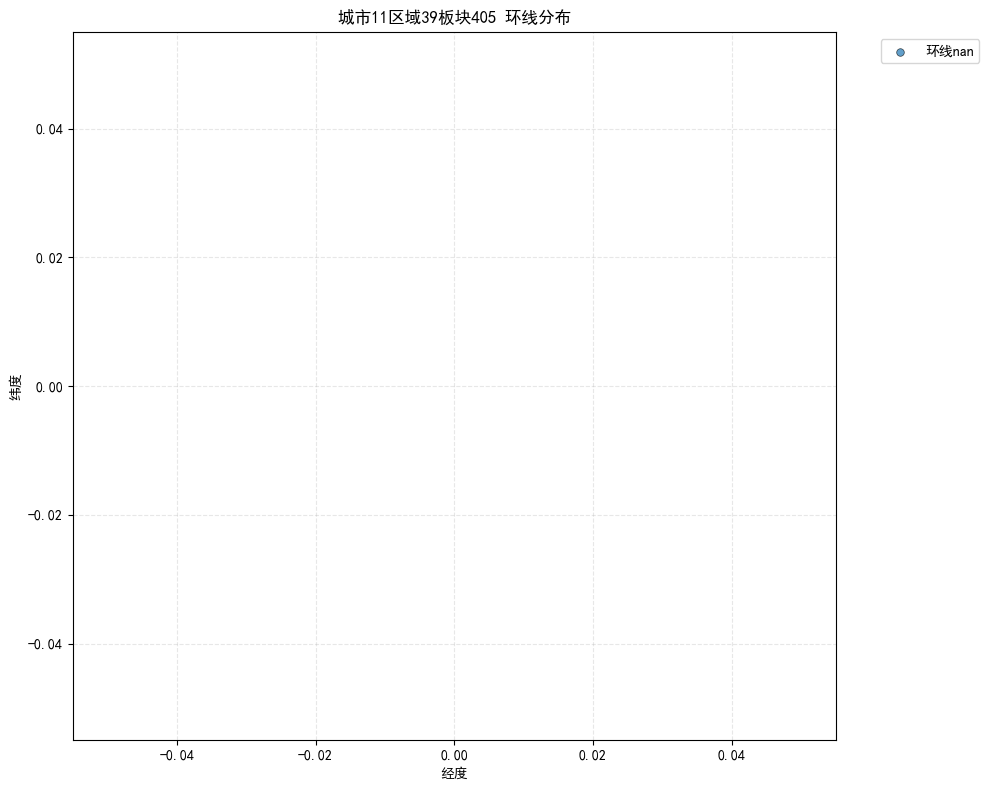


===== 所有城市处理完成：全局统计 =====
全局总样本数：103871
全局填充后有效样本数：68506
全局填充完成率：65.95%

各环线数值最终分布：
环线_数值
1.0       553
2.0     25052
3.0      2480
4.0      2681
5.0      6808
6.0      2432
7.0      3842
8.0      6060
9.0      3219
10.0     2285
11.0    13094
Name: count, dtype: int64


In [188]:
#观察12个城市的房屋分布图，易得：城市1、5、6、8、9、10、11均为空缺值。其余部分有空缺值。我们先处理并不完全为空缺值的城市。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from itertools import cycle

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False

# ---------------------- 1. 数据准备 ----------------------
# 假设原始数据已加载到df中，包含['城市', '区域', '板块', 'lon', 'lat', '环线']等列
df = df.copy()  # 操作副本，避免修改原始数据

# 筛选有效经纬度数据，保留关键列
data = df[['城市', '区域', '板块', 'lon', 'lat', '环线']].dropna(subset=['lon', 'lat']).copy()

# 1.1 环线文字转数字映射
ring_mapping = {
    '二环内': 1, '二至三环': 3, '三至四环': 4, '四至五环': 6,
    '五至六环': 8, '六环外': 10, '内环内': 2, '内环至中环': 5,
    '中环至外环': 7, '内环至外环': 9, '外环外': 11
}
data['环线_数值'] = data['环线'].map(ring_mapping)  # 空缺值保留为NaN

# 查看数据基本信息
print("===== 数据基本信息 =====")
print(f"总样本数：{len(data)}")
print(f"环线数值非空样本数：{data['环线_数值'].notna().sum()}")
print(f"环线数值空缺样本数：{data['环线_数值'].isna().sum()}")
print(f"包含的城市列表：{sorted(data['城市'].unique())}\n")


# ---------------------- 2. 平面距离计算函数 ----------------------
def planar_distance(lat1, lon1, lat2, lon2):
    """计算平面坐标下的欧氏距离（适用于小范围地理数据）"""
    return np.hypot(lon2 - lon1, lat2 - lat1)


# ---------------------- 3. 环线空缺值填充核心函数 ----------------------
def cluster_fill_ring(city_group):
    """
    对单个城市的样本，基于已知环线数值和经纬度聚类填充空缺值
    """
    city = city_group['城市'].iloc[0]
    labeled = city_group[city_group['环线_数值'].notna()].copy()  # 已知样本
    unlabeled = city_group[city_group['环线_数值'].isna()].copy()  # 空缺样本
    filled_group = city_group.copy()

    # 若该城市无已知环线数据，返回原始数据
    if len(labeled) == 0:
        print(f"警告：城市{city}无已知环线数据，无法填充")
        return filled_group, None

    # 转换为相对坐标（基于城市整体经纬度最小值）
    min_lat, min_lon = city_group['lat'].min(), city_group['lon'].min()
    labeled['lat_rel'] = labeled['lat'] - min_lat
    labeled['lon_rel'] = labeled['lon'] - min_lon
    if len(unlabeled) > 0:
        unlabeled['lat_rel'] = unlabeled['lat'] - min_lat
        unlabeled['lon_rel'] = unlabeled['lon'] - min_lon

    # 已知样本聚类（簇数=已知环线类型数）
    n_clusters = len(labeled['环线_数值'].unique())
    labeled_features = labeled[['lat_rel', 'lon_rel']].values

    # 计算已知样本的距离矩阵并聚类
    condensed_dist = []
    for i in range(len(labeled_features)):
        for j in range(i + 1, len(labeled_features)):
            dist = planar_distance(
                labeled_features[i][0], labeled_features[i][1],
                labeled_features[j][0], labeled_features[j][1]
            )
            condensed_dist.append(dist)
    linkage_matrix = linkage(condensed_dist, method='average')
    labeled['cluster_label'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    # 建立聚类标签与环线数值的映射（按众数）
    cluster_to_ring = labeled.groupby('cluster_label')['环线_数值'].agg(
        lambda x: x.mode()[0]
    ).to_dict()

    # 填充空缺样本
    if len(unlabeled) > 0:
        # 计算聚类中心
        cluster_centers = labeled.groupby('cluster_label')[['lat_rel', 'lon_rel']].mean()

        # 为空缺样本分配最近的聚类
        def assign_cluster(row):
            min_dist = np.inf
            best_cluster = 1
            for cluster, center in cluster_centers.iterrows():
                dist = planar_distance(row['lat_rel'], row['lon_rel'], center[0], center[1])
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = cluster
            return best_cluster

        unlabeled['cluster_label'] = unlabeled.apply(assign_cluster, axis=1)
        unlabeled['环线_数值'] = unlabeled['cluster_label'].map(cluster_to_ring)
        filled_group.loc[unlabeled.index, '环线_数值'] = unlabeled['环线_数值']

    # 新增城市级聚类列（与环线数值一致）
    filled_group['城市级聚类'] = filled_group['环线_数值']
    return filled_group, linkage_matrix


# ---------------------- 4. 可视化函数 ----------------------
def plot_ring_cluster(data, city, linkage_matrix=None):
    """绘制单个城市的环线填充结果（区分已知/填充样本）"""
    # 聚类树（已知样本）
    if linkage_matrix is not None:
        plt.figure(figsize=(10, 6))
        dendrogram(linkage_matrix, truncate_mode='lastp', p=len(data['环线_数值'].unique()),
                   leaf_rotation=90, leaf_font_size=10)
        plt.xlabel('已知环线样本')
        plt.ylabel('相对距离（平面坐标）')
        plt.title(f'城市{city} 环线聚类树')
        plt.tight_layout()
        plt.show()

    # 地理散点图
    plt.figure(figsize=(12, 8))
    # 已知样本（彩色）
    known = data[data['环线'].notna()]
    for ring_val in known['环线_数值'].unique():
        subset = known[known['环线_数值'] == ring_val]
        plt.scatter(subset['lon'], subset['lat'], label=f'已知-环线{ring_val}',
                    s=40, alpha=0.8, edgecolors='k', linewidths=0.5)
    # 填充样本（灰色+红边）
    filled = data[data['环线'].isna() & data['环线_数值'].notna()]
    if len(filled) > 0:
        plt.scatter(filled['lon'], filled['lat'], c='gray', edgecolors='red',
                    label='填充-环线值', s=40, alpha=0.8, linewidths=0.5)

    plt.xlabel('经度')
    plt.ylabel('纬度')
    plt.title(f'城市{city} 环线填充结果（地理分布）')
    plt.grid(linestyle='--', alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


def plot_region_plate_cluster(data, level, title_suffix):
    """绘制区域/板块级的环线分布"""
    plt.figure(figsize=(10, 8))
    colors = cycle(plt.cm.tab20(np.linspace(0, 1, len(data['环线_数值'].unique()))))
    for ring_val, color in zip(data['环线_数值'].unique(), colors):
        subset = data[data['环线_数值'] == ring_val]
        plt.scatter(subset['lon'], subset['lat'], c=[color], label=f'环线{ring_val}',
                    s=30, alpha=0.7, edgecolors='k', linewidths=0.5)
    plt.xlabel('经度')
    plt.ylabel('纬度')
    plt.title(f'{level} {title_suffix}')
    plt.grid(linestyle='--', alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# ---------------------- 5. 主流程：批量处理所有城市 ----------------------
# 获取所有不重复的城市
all_cities = sorted(data['城市'].unique())
print(f"开始批量处理所有城市，共{len(all_cities)}个城市...\n")

for target_city in all_cities:
    # 筛选当前城市数据
    city_data = data[data['城市'] == target_city].copy()
    print(f"\n===== 处理城市 {target_city} =====")
    print(f"样本总数：{len(city_data)}")
    print(f"已知环线样本：{len(city_data[city_data['环线_数值'].notna()])}")
    print(f"需填充样本：{len(city_data[city_data['环线_数值'].isna()])}")

    # 5.1 环线填充
    filled_city_data, ring_linkage = cluster_fill_ring(city_data)
    fill_count = filled_city_data['环线_数值'].notna().sum()
    fill_rate = (fill_count / len(filled_city_data)) * 100
    print(f"填充后有效样本数：{fill_count}（完成率：{fill_rate:.2f}%）")

    # 5.2 可视化城市级结果
    plot_ring_cluster(filled_city_data, target_city, ring_linkage)

    # 5.3 处理区域级（选最小编号区域作为示例）
    if not filled_city_data['区域'].empty:
        target_region = filled_city_data['区域'].min()
        region_data = filled_city_data[filled_city_data['区域'] == target_region].copy()
        print(f"\n----- 处理城市{target_city}的区域 {target_region} -----")
        print(f"区域样本数：{len(region_data)}")
        print(f"区域环线分布：{sorted(region_data['环线_数值'].unique())}")
        plot_region_plate_cluster(
            region_data,
            level=f'城市{target_city}区域{target_region}',
            title_suffix='环线分布'
        )

        # 5.4 处理板块级（选最小编号板块作为示例）
        if not region_data['板块'].empty:
            target_plate = region_data['板块'].min()
            plate_data = region_data[region_data['板块'] == target_plate].copy()
            print(f"----- 处理区域{target_region}的板块 {target_plate} -----")
            print(f"板块样本数：{len(plate_data)}")
            print(f"板块环线分布：{sorted(plate_data['环线_数值'].unique())}")
            plot_region_plate_cluster(
                plate_data,
                level=f'城市{target_city}区域{target_region}板块{target_plate}',
                title_suffix='环线分布'
            )

    # 将填充结果合并回原始df
    df.loc[filled_city_data.index, '环线_数值'] = filled_city_data['环线_数值']


# ---------------------- 6. 全局结果统计 ----------------------
print("\n===== 所有城市处理完成：全局统计 =====")
total_samples = len(data)
filled_total = df.loc[data.index, '环线_数值'].notna().sum()
global_rate = (filled_total / total_samples) * 100
print(f"全局总样本数：{total_samples}")
print(f"全局填充后有效样本数：{filled_total}")
print(f"全局填充完成率：{global_rate:.2f}%")
print("\n各环线数值最终分布：")
print(df['环线_数值'].value_counts().sort_index())

# 保存处理后的完整数据（可选）
# df.to_csv('处理后数据.csv', index=False)
# print("处理后的数据已保存为'处理后数据.csv'")

In [189]:
#观察12个城市的房屋分布图，易得：城市1、5、6、8、9、10、11均为空缺值。可以推测得出，这些城市大概率不区分环线。我们决定使用0来填充这些城市的空缺值。
import pandas as pd

# 确保操作副本，避免修改原始数据
df = df.copy()

# 1. 定义需填充0的城市列表
target_cities = [1, 5, 6, 8, 9, 10, 11]

# 2. 筛选指定城市，将其“环线”列填充为0
# 用isin()匹配目标城市，loc定位并赋值
df.loc[df['城市'].isin(target_cities), '环线_数值'] = 0

# 3. 验证填充结果（确认是否全部填充成功）
print("指定城市的'环线_数值'列填充结果验证：")
for city in target_cities:
    # 筛选当前城市数据
    city_data = df[df['城市'] == city]
    # 计算环线值为0的比例
    zero_ratio = (city_data['环线_数值'] == 0).mean()
    # 统计当前城市数据量
    data_count = len(city_data)
    print(f"城市{city}：共{data_count}条数据，环线_数值为0的比例：{zero_ratio:.2%}")

指定城市的'环线_数值'列填充结果验证：
城市1：共6437条数据，环线_数值为0的比例：100.00%
城市5：共3582条数据，环线_数值为0的比例：100.00%
城市6：共2281条数据，环线_数值为0的比例：100.00%
城市8：共5931条数据，环线_数值为0的比例：100.00%
城市9：共1323条数据，环线_数值为0的比例：100.00%
城市10：共15057条数据，环线_数值为0的比例：100.00%
城市11：共754条数据，环线_数值为0的比例：100.00%


In [190]:
print(df['环线_数值'].describe())

count    103871.000000
mean          3.741968
std           3.948016
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max          11.000000
Name: 环线_数值, dtype: float64


In [191]:
import pandas as pd
import re

# 1. 确保“房屋户型”列为字符串类型，并填充缺失值为'0室0厅0厨0卫'
df['房屋户型'] = df['房屋户型'].astype(str).fillna('0室0厅0厨0卫')
# 处理可能的空字符串（若有）
df['房屋户型'] = df['房屋户型'].replace(['', 'nan'], '0室0厅0厨0卫')

# 2. 定义评分函数（优化正则匹配逻辑，兼容所有格式）
def score_house_type(house_type):
    # 提取室、厅、厨、卫的数量（若未匹配到则为0）
    # 匹配“X室”，如“3室”“0室”
    room_match = re.search(r'(\d+)室', house_type)
    room = int(room_match.group(1)) if room_match else 0
    
    # 匹配“X厅”，如“2厅”“0厅”
    hall_match = re.search(r'(\d+)厅', house_type)
    hall = int(hall_match.group(1)) if hall_match else 0
    
    # 匹配“X厨”，如“1厨”“0厨”
    kitchen_match = re.search(r'(\d+)厨', house_type)
    kitchen = int(kitchen_match.group(1)) if kitchen_match else 0
    
    # 匹配“X卫”，如“2卫”“0卫”
    bath_match = re.search(r'(\d+)卫', house_type)
    bath = int(bath_match.group(1)) if bath_match else 0
    
    # 定义权重并计算总分（可根据需求调整权重）
    score = room * 4 + hall * 2 + kitchen * 3 + bath * 3
    return score

# 3. 应用函数生成评分列
df['户型评分'] = df['房屋户型'].apply(score_house_type)

# 4. 查看结果（前10行示例）
print("修复后的数据及评分：")
print(df[['房屋户型', '户型评分']].head(10))

修复后的数据及评分：
       房屋户型  户型评分
0  2室1厅1厨1卫    16
1  3室1厅1厨1卫    20
2  3室2厅1厨2卫    25
3  6室3厅1厨3卫    42
4     1房间1卫     3
5  5室2厅1厨4卫    39
6  3室2厅1厨2卫    25
7  0室0厅0厨0卫     0
8  3室1厅1厨2卫    23
9  5室3厅1厨4卫    41


In [192]:
print(df['户型评分'].describe())

count    103871.000000
mean         20.596692
std           6.623662
min           0.000000
25%          16.000000
50%          20.000000
75%          25.000000
max         104.000000
Name: 户型评分, dtype: float64


In [193]:
import pandas as pd
import re

# 1. 处理缺失值：填充为0（字符串格式，避免后续解析错误）
df['所在楼层'] = df['所在楼层'].fillna('0').astype(str)

# 2. 定义评分函数
def score_floor(floor_info):
    # 提取总楼层数（默认0层）
    total_floor_match = re.search(r'共(\d+)层', floor_info)
    total_floor = int(total_floor_match.group(1)) if total_floor_match else 0
    
    # 提取楼层类型（默认缺失值）
    if '地下室' in floor_info:
        floor_type = '地下室'
    elif '底层' in floor_info:
        floor_type = '底层'
    elif '低楼层' in floor_info:
        floor_type = '低楼层'
    elif '中楼层' in floor_info:
        floor_type = '中楼层'
    elif '高楼层' in floor_info:
        floor_type = '高楼层'
    elif '顶层' in floor_info:
        floor_type = '顶层'
    else:
        floor_type = '缺失'  # 应对异常值
    
    # 计算基础分（按楼层类型）
    type_score_map = {
        '中楼层': 4,
        '高楼层': 3,
        '低楼层': 2,
        '顶层': 1,
        '底层': 0,
        '地下室': -2,
        '缺失': 0  # 缺失值按0分处理
    }
    base_score = type_score_map[floor_type]
    
    # 计算总楼层数加成（每10层加1分，最高5分）
    floor_bonus = min(total_floor // 10, 5)  # 控制最高加5分
    
    # 总评分
    total_score = base_score + floor_bonus
    return total_score

# 3. 应用函数生成评分列
df['楼层评分'] = df['所在楼层'].apply(score_floor)

# 4. 查看结果（前10行示例）
print("楼层信息及对应评分：")
print(df[['所在楼层', '楼层评分']].head(10))

楼层信息及对应评分：
         所在楼层  楼层评分
0   中楼层 (共5层)     4
1    顶层 (共6层)     1
2   低楼层 (共6层)     2
3    底层 (共2层)     0
4  中楼层 (共10层)     5
5   地下室 (共2层)    -2
6  高楼层 (共20层)     5
7   地下室 (共0层)    -2
8  高楼层 (共22层)     5
9    底层 (共3层)     0


In [194]:
print(df['楼层评分'].describe())

count    103871.000000
mean          4.255942
std           1.615764
min          -2.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           9.000000
Name: 楼层评分, dtype: float64


In [195]:
import pandas as pd
import re

# 1. 定义函数：提取建筑面积的数值，去除“㎡”单位
def extract_area(area_str):
    # 处理空值或缺失值，返回空（后续可按需填充为0）
    if pd.isna(area_str) or area_str == '' or area_str == '0':
        return None
    
    # 转换为字符串，避免数值型数据报错
    area_str = str(area_str)
    
    # 正则提取所有数字（支持整数、小数，忽略“㎡”及空格）
    # 例如“120㎡”“89.5 ㎡”“75.2平方米”均能提取出数值
    num_match = re.search(r'(\d+\.?\d*)', area_str)
    
    if num_match:
        # 转换为浮点数（保留小数，如“89.5㎡”→89.5）
        return float(num_match.group(1))
    else:
        # 格式异常（无有效数字），返回空
        return None

# 2. 应用函数处理“建筑面积”列，生成无单位的数值列
# 建议新建列“建筑面积_数值”，保留原列避免数据丢失；若需覆盖原列，可改为 df['建筑面积'] = ...
df['建筑面积_数值'] = df['建筑面积'].apply(extract_area)

# 3. 查看处理结果（验证单位是否已去除）
print("处理前的‘建筑面积’列（含单位）：")
print(df['建筑面积'].head(10).tolist())

print("\n处理后的‘建筑面积_数值’列（无单位，数值型）：")
print(df['建筑面积_数值'].head(10).tolist())

# 4. （可选）查看数据类型，确认已转为数值型
print(f"\n处理后列的数据类型：{df['建筑面积_数值'].dtype}")

处理前的‘建筑面积’列（含单位）：
['52.3㎡', '127.44㎡', '118.02㎡', '293.23㎡', '39.85㎡', '259.72㎡', '134.1㎡', '12.74㎡', '192.12㎡', '288.96㎡']

处理后的‘建筑面积_数值’列（无单位，数值型）：
[52.3, 127.44, 118.02, 293.23, 39.85, 259.72, 134.1, 12.74, 192.12, 288.96]

处理后列的数据类型：float64


In [196]:
print(df['建筑面积_数值'].describe())

count    103871.000000
mean         99.236130
std          46.793589
min          11.700000
25%          70.980000
50%          91.110000
75%         118.760000
max         508.110000
Name: 建筑面积_数值, dtype: float64


In [197]:
import pandas as pd

# 1. 定义朝向基础分字典
orientation_base_score = {
    "南": 10,
    "东南": 9,
    "西南": 8.5,
    "北": 8,
    "东北": 7.5,
    "西北": 7,
    "东": 6,
    "西": 5
}

# 2. 定义打分函数
def calculate_orientation_score(orient_str):
    """
    计算房屋朝向的分数
    参数：orient_str - 房屋朝向字符串（如"南 北"、"东 东南"，空白值为NaN或空字符串）
    返回：总分数（保留2位小数）
    """
    # 处理空白值（空字符串、NaN等）
    if pd.isna(orient_str) or str(orient_str).strip() == "":
        return 0.0
    
    # 拆分朝向列表（按空格分割，去重避免重复计算）
    orient_list = list(set(str(orient_str).strip().split()))  # 去重
    valid_orient = [o for o in orient_list if o in orientation_base_score]  # 过滤有效朝向
    
    if not valid_orient:  # 无有效朝向时返回0分
        return 0.0
    
    # 计算基础分（有效朝向的平均分）
    base_score = sum(orientation_base_score[o] for o in valid_orient) / len(valid_orient)
    
    # 计算数量加分（种类数量）
    num_types = len(valid_orient)
    if num_types == 1:
        add_score = 0
    elif num_types == 2:
        add_score = 1
    else:  # 3种及以上
        add_score = 2
    
    # 总分数（保留2位小数）
    total_score = round(base_score + add_score, 2)
    return total_score

# 3. 对df中的“房屋朝向”列批量打分并新增列
if "房屋朝向" in df.columns:
    # 新增“房屋朝向_分数”列
    df["房屋朝向_分数"] = df["房屋朝向"].apply(calculate_orientation_score)
    
    # 验证结果
    print("房屋朝向打分结果（前10行）：")
    print(df[["房屋朝向", "房屋朝向_分数"]].head(10))
    
    # 统计分数分布
    print("\n房屋朝向分数分布：")
    print(df["房屋朝向_分数"].describe())
    
    # 查看高分和低分示例
    print("\n分数最高的3种朝向：")
    print(df.sort_values("房屋朝向_分数", ascending=False).drop_duplicates("房屋朝向").head(3)[["房屋朝向", "房屋朝向_分数"]])
    
    print("\n分数最低的3种朝向：")
    print(df.sort_values("房屋朝向_分数").drop_duplicates("房屋朝向").head(3)[["房屋朝向", "房屋朝向_分数"]])
else:
    print("警告：df中不存在'房屋朝向'列，请检查列名是否正确")

房屋朝向打分结果（前10行）：
      房屋朝向  房屋朝向_分数
0      南 北    10.00
1      南 北    10.00
2       东南     9.00
3  东 南 西 北     9.25
4        南    10.00
5      南 北    10.00
6      南 北    10.00
7      南 北    10.00
8       东南     9.00
9      南 北    10.00

房屋朝向分数分布：
count    103871.000000
mean          9.240607
std           1.296370
min           0.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          11.170000
Name: 房屋朝向_分数, dtype: float64

分数最高的3种朝向：
          房屋朝向  房屋朝向_分数
83268  东南 南 西南    11.17
45754  南 西南 东南    11.17
86349  东南 西南 南    11.17

分数最低的3种朝向：
      房屋朝向  房屋朝向_分数
69397  NaN      0.0
31829    西      5.0
36999    东      6.0


In [198]:
import pandas as pd

# 检查“房屋朝向”列是否存在
if "房屋朝向" not in df.columns:
    print("警告：数据中不存在'房屋朝向'列，请检查列名是否正确")
else:
    # 记录删除前的行数和缺失值数量
    original_rows = df.shape[0]
    missing_count = df["房屋朝向"].isna().sum()  # 统计缺失值数量（NaN）
    
    # 同时处理空字符串（若有）：将空字符串视为缺失值
    # 先将空字符串转换为NaN，再删除
    df["房屋朝向"] = df["房屋朝向"].replace(r'^\s*$', pd.NA, regex=True)  # 匹配空字符串或纯空格
    missing_count_after = df["房屋朝向"].isna().sum()  # 包含空字符串转换后的缺失值
    
    # 删除“房屋朝向”列为缺失值的行
    df_clean = df.dropna(subset=["房屋朝向"]).copy()
    remaining_rows = df_clean.shape[0]
    deleted_rows = original_rows - remaining_rows
    
    # 输出处理结果
    print("=" * 60)
    print("房屋朝向列缺失值处理结果")
    print("=" * 60)
    print(f"原始数据总行数：{original_rows}")
    print(f"房屋朝向列缺失值（含空字符串）数量：{missing_count_after}")
    print(f"删除后剩余行数：{remaining_rows}")
    print(f"本次共删除 {deleted_rows} 行数据")
    
    # 验证删除效果
    remaining_missing = df_clean["房屋朝向"].isna().sum()
    if remaining_missing == 0:
        print("\n✅ 验证：房屋朝向列已无缺失值")
    else:
        print(f"\n⚠️ 警告：仍存在 {remaining_missing} 个缺失值")

# 后续可使用清理后的df_clean进行分析（如房屋朝向打分）
# 例如：df_clean["房屋朝向_分数"] = df_clean["房屋朝向"].apply(calculate_orientation_score)

df=df_clean

房屋朝向列缺失值处理结果
原始数据总行数：103871
房屋朝向列缺失值（含空字符串）数量：1
删除后剩余行数：103870
本次共删除 1 行数据

✅ 验证：房屋朝向列已无缺失值


In [199]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式便于匹配）
df['建筑结构'] = df['建筑结构'].fillna('0').replace('', '0')

# 2. 定义评分映射字典
structure_score = {
    '钢结构': 5,
    '钢混结构': 4,
    '框架结构': 3,
    '混合结构': 2,
    '砖混结构': 1,
    '砖木结构': 0,
    '未知结构': 0,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射生成新列
df['结构评分'] = df['建筑结构'].map(structure_score)

# 4. 查看结果（示例）
print("建筑结构及对应评分：")
print(df[['建筑结构', '结构评分']].drop_duplicates().sort_values(by='结构评分', ascending=False))

建筑结构及对应评分：
       建筑结构  结构评分
67      钢结构     5
2      钢混结构     4
16704  框架结构     3
0      混合结构     2
13     砖混结构     1
7         0     0
1642   砖木结构     0
11342  未知结构     0


In [200]:
print(df['结构评分'].describe())

count    103870.000000
mean          3.490642
std           1.146343
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: 结构评分, dtype: float64


In [201]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式便于匹配）
df['装修情况'] = df['装修情况'].fillna('0').replace('', '0')

# 2. 定义评分映射字典
decoration_score = {
    '精装': 3,
    '简装': 2,
    '其他': 1,
    '毛坯': 0,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射生成新列
df['装修评分'] = df['装修情况'].map(decoration_score)

# 4. 查看结果（去重后展示所有类型及评分）
print("装修情况及对应评分：")
print(df[['装修情况', '装修评分']].drop_duplicates().sort_values(by='装修评分', ascending=False))

装修情况及对应评分：
   装修情况  装修评分
0    精装     3
2    简装     2
30   其他     1
7     0     0
16   毛坯     0


In [202]:
print(df['装修评分'].describe())

count    103870.000000
mean          1.969924
std           1.084152
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: 装修评分, dtype: float64


In [203]:
import pandas as pd
import re

# 1. 处理缺失值：填充为0（字符串格式，便于后续解析）
df['梯户比例'] = df['梯户比例'].fillna('0').replace('', '0')

# 2. 定义中文数字转阿拉伯数字的映射（处理“两”“一”等）
cn_num_map = {
    '一': 1,
    '两': 2,
    '三': 3,
    '四': 4,
    '五': 5,
    '六': 6,
    '七': 7,
    '八': 8,
    '九': 9,
    '十': 10,
    '十一': 11,
    '十二': 12,
    '十三': 13,
    '十四': 14,
    '十五': 15,
    '十六': 16,
    '十七': 17,
    '十八': 18,
    '十九': 19,
    '二十': 20
}

# 3. 定义评分函数
def score_ladder_house(ratio_str):
    if ratio_str == '0':  # 空缺值直接返回0分
        return 0
    
    # 提取电梯数和户数（处理中文数字）
    # 匹配“X梯Y户”中的X和Y（支持数字和中文数字）
    match = re.match(r'(.+)梯(.+)户', ratio_str)
    if not match:
        return 0  # 格式异常按0分处理
    
    ladder_part, house_part = match.groups()
    
    # 转换电梯数为阿拉伯数字
    if ladder_part in cn_num_map:
        ladder = cn_num_map[ladder_part]
    else:
        ladder = int(ladder_part) if ladder_part.isdigit() else 0
    
    # 转换户数为阿拉伯数字
    if house_part in cn_num_map:
        house = cn_num_map[house_part]
    else:
        house = int(house_part) if house_part.isdigit() else 0
    
    # 避免除数为0（户数为0时按最低分处理）
    if house == 0:
        return 0
    
    # 计算梯户比（电梯数/户数）
    ratio = ladder / house
    
    # 按比值区间打分（0-5分，比值越高分越高）
    if ratio >= 1.0:  # 1梯1户及以上（电梯充足）
        return 5
    elif 0.5 <= ratio < 1.0:  # 如2梯3户（0.67）、1梯2户（0.5）
        return 4
    elif 0.3 <= ratio < 0.5:  # 如1梯3户（0.33）、2梯5户（0.4）
        return 3
    elif 0.1 <= ratio < 0.3:  # 如1梯5户（0.2）、2梯10户（0.2）
        return 2
    elif 0 < ratio < 0.1:  # 如1梯11户及以上（电梯紧张）
        return 1
    else:  # 其他异常情况
        return 0

# 4. 应用函数生成评分列
df['梯户比评分'] = df['梯户比例'].apply(score_ladder_house)

# 5. 查看结果（示例：展示不同梯户比对应的评分）
print("梯户比例及对应评分（部分示例）：")
print(df[['梯户比例', '梯户比评分']].drop_duplicates().sample(10).sort_values(by='梯户比评分', ascending=False))

梯户比例及对应评分（部分示例）：
         梯户比例  梯户比评分
24455   十五梯六户      5
3466     八梯八户      5
28366    五梯五户      5
72854   十八梯三户      5
79628   五梯十四户      3
241     两梯十九户      2
39634  六梯三十五户      0
48123  四梯四十二户      0
23279  六梯二十四户      0
49020  六梯六十八户      0


In [204]:
print(df['梯户比评分'].describe())

count    103870.000000
mean          3.082468
std           1.232456
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: 梯户比评分, dtype: float64


In [205]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保后续匹配无遗漏）
df['配备电梯'] = df['配备电梯'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：直接关联“有/无/空缺”与对应分数
elevator_score = {
    '有': 3,
    '无': 0,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射，生成“电梯评分”列
df['电梯评分'] = df['配备电梯'].map(elevator_score)

# 4. 查看结果（去重后展示所有类型及对应评分，清晰直观）
print("配备电梯情况及对应评分：")
print(df[['配备电梯', '电梯评分']].drop_duplicates().sort_values(by='电梯评分', ascending=False))

配备电梯情况及对应评分：
  配备电梯  电梯评分
2    有     3
0    无     0
3    0     0


In [206]:
print(df['电梯评分'].describe())

count    103870.000000
mean          2.045730
std           1.397211
min           0.000000
25%           0.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: 电梯评分, dtype: float64


In [207]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保匹配无遗漏）
df['别墅类型'] = df['别墅类型'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：直接关联别墅类型与对应分数
villa_score = {
    '独栋': 5,
    '双拼': 4,
    '联排': 3,
    '叠拼': 2,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射，生成“别墅类型评分”列
df['别墅类型评分'] = df['别墅类型'].map(villa_score)

# 4. 查看结果（去重后按分数降序展示，清晰对比各类别价值）
print("别墅类型及对应评分：")
print(df[['别墅类型', '别墅类型评分']].drop_duplicates().sort_values(by='别墅类型评分', ascending=False))

别墅类型及对应评分：
     别墅类型  别墅类型评分
3      独栋       5
3551   双拼       4
89     联排       3
1305   叠拼       2
0       0       0


In [208]:
print(df['别墅类型评分'].describe())

count    103870.000000
mean          0.044045
std           0.386267
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: 别墅类型评分, dtype: float64


In [209]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保匹配无遗漏）
df['交易权属'] = df['交易权属'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：关联权属类型与对应分数
ownership_score = {
    '商品房': 5,
    '私产': 5,
    '已购公房': 4,
    '售后公房': 4,
    '央产房': 4,
    '房改房': 3,
    '集资房': 3,
    '一类经济适用房': 2,
    '二类经济适用房': 2,
    '限价商品房': 2,
    '拆迁还建房': 1,
    '定向安置房': 1,
    '动迁安置房': 1,
    '回迁房': 1,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射，生成“权属评分”列
df['权属评分'] = df['交易权属'].map(ownership_score)

# 4. 查看结果（去重后按分数降序展示，清晰对比各类别价值）
print("交易权属及对应评分：")
print(df[['交易权属', '权属评分']].drop_duplicates().sort_values(by='权属评分', ascending=False))

交易权属及对应评分：
          交易权属  权属评分
0          商品房   5.0
63          私产   5.0
21        已购公房   4.0
34         央产房   4.0
69406     售后公房   4.0
20162      房改房   3.0
23105      集资房   3.0
33     一类经济适用房   2.0
22       限价商品房   2.0
147    二类经济适用房   2.0
23041    拆迁还建房   1.0
1139     定向安置房   1.0
47972    动迁安置房   1.0
76298      回迁房   1.0
22972    经济适用房   NaN


In [210]:
print(df['权属评分'].describe())

count    103598.000000
mean          4.895471
std           0.523353
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: 权属评分, dtype: float64


In [211]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保匹配无遗漏）
df['房屋用途'] = df['房屋用途'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：关联房屋用途与对应分数
usage_score = {
    # 5分：纯居住、高体验、强流通
    '普通住宅': 5,
    '花园洋房': 5,
    '四合院': 5,
    '新式里弄': 5,
    # 4分：居住为主、属性较纯
    '公寓（住宅）': 4,
    '公寓': 4,
    '公寓/公寓': 4,
    '公寓/住宅': 4,
    '住宅式公寓': 4,
    '老公寓': 4,
    # 3分：纯居住但流通略弱
    '别墅': 3,
    # 2分：商住混合、体验中等
    '酒店式公寓': 2,
    '商务公寓': 2,
    '商务型公寓': 2,
    '商住两用': 2,
    # 1分：商业/办公为主、居住弱
    '底商': 1,
    '商业': 1,
    '商业办公类': 1,
    '写字楼': 1,
    # 0分：无居住功能/信息缺失
    '车库': 0,
    '0': 0
}

# 3. 应用评分映射，生成“用途评分”列
df['用途评分'] = df['房屋用途'].map(usage_score)

# 4. 查看结果（去重后按分数降序展示，清晰对比各类别价值）
print("房屋用途及对应评分：")
result = df[['房屋用途', '用途评分']].drop_duplicates().sort_values(by='用途评分', ascending=False)
print(result)

房屋用途及对应评分：
         房屋用途  用途评分
0        普通住宅     5
69401    新式里弄     5
69874    花园洋房     5
1642      四合院     5
8       公寓/住宅     4
15623   住宅式公寓     4
69450     老公寓     4
289     公寓/公寓     4
67         公寓     4
7465   公寓（住宅）     4
3          别墅     3
16557    商住两用     2
3466    商务型公寓     2
51      酒店式公寓     2
79623    商务公寓     2
74372      底商     1
4       商业办公类     1
87703     写字楼     1
74707      商业     1
7          车库     0
87938       0     0


In [212]:
print(df['用途评分'].describe())

count    103870.000000
mean          4.775999
std           0.831505
min           0.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: 用途评分, dtype: float64


In [213]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保匹配无遗漏）
df['房屋年限'] = df['房屋年限'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：直接关联年限类型与对应分数
house_age_score = {
    '满五年': 5,
    '满两年': 3,
    '未满两年': 1,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射，生成“房屋年限评分”列
df['房屋年限评分'] = df['房屋年限'].map(house_age_score)

# 4. 查看结果（去重后按分数降序展示，清晰对比各类别价值）
print("房屋年限及对应评分：")
print(df[['房屋年限', '房屋年限评分']].drop_duplicates().sort_values(by='房屋年限评分', ascending=False))

房屋年限及对应评分：
     房屋年限  房屋年限评分
0     满五年       5
21    满两年       3
106  未满两年       1
185     0       0


In [214]:
print(df['房屋年限评分'].describe())

count    103870.000000
mean          2.211100
std           2.220061
min           0.000000
25%           0.000000
50%           1.000000
75%           5.000000
max           5.000000
Name: 房屋年限评分, dtype: float64


In [215]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保匹配无遗漏）
df['产权所属'] = df['产权所属'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：关联产权类型与对应分数
ownership_type_score = {
    '非共有': 3,
    '共有': 1,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射，生成“产权所属评分”列
df['产权所属评分'] = df['产权所属'].map(ownership_type_score)

# 4. 查看结果（去重后展示所有类型及评分）
print("产权所属及对应评分：")
print(df[['产权所属', '产权所属评分']].drop_duplicates().sort_values(by='产权所属评分', ascending=False))

产权所属及对应评分：
  产权所属  产权所属评分
0  非共有       3
9   共有       1


In [216]:
import pandas as pd
import re

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保后续解析无遗漏）
df['房屋总数'] = df['房屋总数'].fillna('0').replace('', '0')

# 2. 定义评分函数
def score_house_total(house_total_str):
    if house_total_str == '0':  # 空缺值直接返回0分
        return 0
    
    # 提取房屋数量（去除“户”字，转换为整数）
    # 匹配数字部分（如“100户”提取“100”）
    num_match = re.search(r'(\d+)', house_total_str)
    if not num_match:
        return 0  # 格式异常按0分处理
    
    house_total = int(num_match.group(1))
    
    # 按房屋总数区间打分
    if 100 <= house_total <= 500:
        return 5
    elif 30 <= house_total <= 99:
        return 4
    elif 501 <= house_total <= 1000:
        return 3
    elif 1 <= house_total <= 29:
        return 2
    elif house_total >= 1001:
        return 1
    else:
        return 0  # 其他异常值（如0户）按0分处理

# 3. 应用函数生成评分列
df['房屋总数评分'] = df['房屋总数'].apply(score_house_total)

# 4. 查看结果（示例：展示不同规模对应的评分）
print("房屋总数及对应评分（部分示例）：")
print(df[['房屋总数', '房屋总数评分']].drop_duplicates().sample(10).sort_values(by='房屋总数评分', ascending=False))

房屋总数及对应评分（部分示例）：
        房屋总数  房屋总数评分
29787   236户       5
83      562户       3
2044    950户       3
69756  1024户       1
81274  2218户       1
29110  1749户       1
23264  1494户       1
88660  1290户       1
79637  2162户       1
1524       0       0


In [217]:
import pandas as pd
import re

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保后续解析无遗漏）
df['楼栋总数'] = df['楼栋总数'].fillna('0').replace('', '0')

# 2. 定义评分函数
def score_building_total(building_total_str):
    if building_total_str == '0':  # 空缺值直接返回0分
        return 0
    
    # 提取楼栋数量（去除“栋”字，转换为整数）
    # 匹配数字部分（如“15栋”提取“15”）
    num_match = re.search(r'(\d+)', building_total_str)
    if not num_match:
        return 0  # 格式异常按0分处理
    
    building_total = int(num_match.group(1))
    
    # 按楼栋总数区间打分
    if 10 <= building_total <= 30:
        return 5
    elif 31 <= building_total <= 60:
        return 4
    elif 3 <= building_total <= 9:
        return 3
    elif building_total >= 61:
        return 2
    elif 1 <= building_total <= 2:
        return 1
    else:
        return 0  # 其他异常值（如0栋）按0分处理

# 3. 应用函数生成评分列
df['楼栋总数评分'] = df['楼栋总数'].apply(score_building_total)

# 4. 查看结果（示例：展示不同楼栋数对应的评分）
print("楼栋总数及对应评分（部分示例）：")
print(df[['楼栋总数', '楼栋总数评分']].drop_duplicates().sample(10).sort_values(by='楼栋总数评分', ascending=False))

楼栋总数及对应评分（部分示例）：
       楼栋总数  楼栋总数评分
21      17栋       5
69668  498栋       2
88377  133栋       2
49211   62栋       2
69654  169栋       2
81071  523栋       2
70332  134栋       2
71168  112栋       2
69471  170栋       2
352    114栋       2


In [218]:
import pandas as pd
import re

# 1. 处理列名空格（若列名含空格“绿 化 率”，统一为“绿化率”）
df.rename(columns={'绿 化 率': '绿化率'}, inplace=True)

# 2. 处理缺失值并统一数据类型为字符串（关键修正：避免float类型导致正则报错）
# 先填充缺失值为0，再强制转换为字符串
df['绿化率'] = df['绿化率'].fillna(0).astype(str).replace('nan', '0').replace('', '0')

# 3. 定义评分函数（兼容字符串和数值转换）
def score_green_rate(green_rate_str):
    # 若输入为0（字符串或数值），直接返回0分
    if green_rate_str in ['0', '0.0']:
        return 0
    
    # 提取百分比数值（支持整数/小数，如“25.5%”“30”等格式）
    num_match = re.search(r'(\d+\.?\d*)', green_rate_str)
    if not num_match:
        return 0  # 格式异常按0分处理
    
    try:
        green_rate = float(num_match.group(1))  # 转换为数值
    except:
        return 0  # 转换失败按0分处理
    
    # 处理异常值（超过100%的不合理数据）
    if green_rate > 100:
        return 0
    
    # 按绿化率区间打分
    if green_rate >= 30:
        return 5
    elif 20 <= green_rate < 30:
        return 4
    elif 10 <= green_rate < 20:
        return 3
    elif 3 <= green_rate < 10:
        return 2
    elif 0 <= green_rate < 3:
        return 1
    else:
        return 0  # 负数值按0分处理

# 4. 应用函数生成评分列
df['绿化率评分'] = df['绿化率'].apply(score_green_rate)

# 5. 查看结果（验证修正效果）
print("修正后的数据类型：", df['绿化率'].dtype)
print("\n绿化率及对应评分（部分示例）：")
print(df[['绿化率', '绿化率评分']].drop_duplicates().sample(10).sort_values(by='绿化率评分', ascending=False))

修正后的数据类型： object

绿化率及对应评分（部分示例）：
          绿化率  绿化率评分
23736   0.021      1
70672    0.53      1
80881  0.5013      1
80891  0.4092      1
89676   0.313      1
88261   0.724      1
2897     0.22      1
81147   0.377      1
85015  0.4583      1
80798  0.3102      1


In [219]:
import pandas as pd

# 1. 处理列名空格（将“容 积 率”统一为“容积率”，避免列名问题）
df.rename(columns={'容 积 率': '容积率'}, inplace=True)

# 2. 处理缺失值：填充为0（确保数值型缺失值被正确识别）
df['容积率'] = df['容积率'].fillna(0)

# 3. 定义评分函数（直接处理数值型数据，无需额外转换）
def score_floor_area_ratio(ratio):
    # 空缺值（0）直接返回0分
    if ratio == 0:
        return 0
    
    # 按容积率区间打分（数值越低，得分越高）
    if ratio <= 1.0:
        return 5
    elif 1.01 <= ratio <= 2.0:
        return 4
    elif 2.01 <= ratio <= 3.0:
        return 3
    elif 3.01 <= ratio <= 5.0:
        return 2
    elif ratio >= 5.01:
        return 1
    else:
        return 0  # 异常值（如负数）按0分处理

# 4. 应用函数生成评分列
df['容积率评分'] = df['容积率'].apply(score_floor_area_ratio)

# 5. 查看结果（验证评分效果）
print("容积率及对应评分（部分示例）：")
print(df[['容积率', '容积率评分']].drop_duplicates().sample(10).sort_values(by='容积率评分', ascending=False))

容积率及对应评分（部分示例）：
        容积率  容积率评分
72144  0.38      5
93749  0.35      5
4035   0.30      5
80870  2.51      3
2493   3.12      2
69721  3.01      2
88312  3.17      2
88139  4.51      2
6025   6.20      1
81265  5.09      1


In [220]:
import pandas as pd
import re

# 1. 处理列名空格（将“物 业 费”统一为“物业费”）
df.rename(columns={'物 业 费': '物业费'}, inplace=True)

# 2. 处理缺失值：填充为0（字符串格式，确保解析无遗漏）
df['物业费'] = df['物业费'].fillna('0').replace('', '0')

# 3. 定义函数提取物业费数值（支持单值和区间值，取平均值）
def extract_fee(fee_str):
    if fee_str == '0':
        return 0.0
    
    # 提取数值（支持“0.5元/月/㎡”或“0.5-1.0元/月/㎡”格式）
    nums = re.findall(r'(\d+\.?\d*)', fee_str)
    if not nums:
        return 0.0  # 格式异常返回0
    
    try:
        nums = [float(num) for num in nums]
        # 单值直接返回，区间值取平均值
        return nums[0] if len(nums) == 1 else sum(nums) / 2
    except:
        return 0.0  # 转换失败返回0

# 4. 定义评分函数
def score_property_fee(fee_str):
    # 先提取物业费数值
    fee = extract_fee(fee_str)
    
    # 按物业费区间打分
    if 1.0 <= fee <= 2.5:
        return 5
    elif 0.5 <= fee < 1.0:
        return 4
    elif 2.51 <= fee <= 4.0:
        return 3
    elif 0.1 <= fee < 0.5:
        return 2
    elif fee >= 4.01:
        return 1
    else:
        return 0  # 0值或异常值（如负数）按0分处理

# 5. 应用函数生成评分列
df['物业费评分'] = df['物业费'].apply(score_property_fee)

# 6. 查看结果（验证评分效果）
print("物业费及对应评分（部分示例）：")
print(df[['物业费', '物业费评分']].drop_duplicates().sample(10).sort_values(by='物业费评分', ascending=False))

物业费及对应评分（部分示例）：
                   物业费  物业费评分
69461    0.9-1.41元/月/㎡      5
69848   1.29-1.44元/月/㎡      5
16680    1.58-1.8元/月/㎡      5
71066    1.8-1.92元/月/㎡      5
6395     0.5-2.68元/月/㎡      5
69772        1.91元/月/㎡      5
16903     1.3-1.9元/月/㎡      5
286         1-5.6元/月/㎡      3
71168        0.25元/月/㎡      2
103130         19元/月/㎡      1


In [221]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保匹配无遗漏）
df['供水'] = df['供水'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：直接关联供水类型与对应分数
water_score = {
    '民水': 5,
    '商水/民水': 3,
    '商水': 1,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射，生成“供水评分”列
df['供水评分'] = df['供水'].map(water_score)

# 4. 查看结果（去重后展示所有类型及评分，清晰直观）
print("供水类型及对应评分：")
print(df[['供水', '供水评分']].drop_duplicates().sort_values(by='供水评分', ascending=False))

供水类型及对应评分：
        供水  供水评分
0       民水     5
1    商水/民水     3
61      商水     1
287      0     0


In [222]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保匹配准确）
df['供暖'] = df['供暖'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：直接关联供暖类型与对应分数
heating_score = {
    '集中供暖': 5,
    '集中供暖/自采暖': 4,
    '自采暖': 3,
    '集中供暖/自采暖/无供暖': 2,
    '自采暖/无供暖': 1,
    '无供暖': 0,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射，生成“供暖评分”列
df['供暖评分'] = df['供暖'].map(heating_score)

# 4. 查看结果（展示所有类型及对应评分）
print("供暖类型及对应评分：")
print(df[['供暖', '供暖评分']].drop_duplicates().sort_values(by='供暖评分', ascending=False))

供暖类型及对应评分：
                 供暖  供暖评分
0              集中供暖     5
2          集中供暖/自采暖     4
1               自采暖     3
69461  集中供暖/自采暖/无供暖     2
69417       自采暖/无供暖     1
1524              0     0
70259           无供暖     0


In [223]:
import pandas as pd

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保匹配无遗漏）
df['供电'] = df['供电'].fillna('0').replace('', '0')

# 2. 定义评分映射字典：直接关联供电类型与对应分数
electricity_score = {
    '民电': 5,
    '商电/民电': 3,
    '商电': 1,
    '0': 0  # 对应空缺值填充后的标记
}

# 3. 应用评分映射，生成“供电评分”列
df['供电评分'] = df['供电'].map(electricity_score)

# 4. 查看结果（去重后按分数降序展示，清晰对比）
print("供电类型及对应评分：")
print(df[['供电', '供电评分']].drop_duplicates().sort_values(by='供电评分', ascending=False))

供电类型及对应评分：
        供电  供电评分
0       民电     5
1    商电/民电     3
30      商电     1
287      0     0


In [224]:
import pandas as pd
import re

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保解析无遗漏）
df['燃气费'] = df['燃气费'].fillna('0').replace('', '0')

# 2. 定义函数提取燃气费数值（支持单值和区间值，取平均值）
def extract_gas_fee(fee_str):
    if fee_str == '0':
        return 0.0
    
    # 提取数值（支持“2.5元/m³”或“2.0-3.0元/m³”格式）
    nums = re.findall(r'(\d+\.?\d*)', fee_str)
    if not nums:
        return 0.0  # 格式异常返回0
    
    try:
        nums = [float(num) for num in nums]
        # 单值直接返回，区间值取平均值（更贴合实际支付成本）
        return nums[0] if len(nums) == 1 else sum(nums) / 2
    except:
        return 0.0  # 数值转换失败返回0

# 3. 定义评分函数
def score_gas_fee(fee_str):
    # 先提取燃气费代表数值
    gas_fee = extract_gas_fee(fee_str)
    
    # 按价格区间打分
    if 2.0 <= gas_fee <= 3.0:
        return 5
    elif 1.5 <= gas_fee < 2.0:
        return 4
    elif 3.01 <= gas_fee <= 4.0:
        return 3
    elif 1.0 <= gas_fee < 1.5:
        return 2
    elif gas_fee >= 4.01:
        return 1
    else:
        return 0  # 0值或异常值（如负数）按0分处理

# 4. 应用函数生成评分列
df['燃气费评分'] = df['燃气费'].apply(score_gas_fee)

# 5. 查看结果（验证评分效果）
print("燃气费及对应评分（部分示例）：")
print(df[['燃气费', '燃气费评分']].drop_duplicates().sample(10).sort_values(by='燃气费评分', ascending=False))

燃气费及对应评分（部分示例）：
                 燃气费  燃气费评分
82042  2.85-2.95元/m³      5
78890        2.2元/m³      5
69769   0.3-3.68元/m³      4
80806  2.95-3.31元/m³      3
77582        3.1元/m³      3
84979  2.95-3.33元/m³      3
80965       3.33元/m³      3
88404  3.45-3.48元/m³      3
77455  2.28-4.91元/m³      3
73807        4.5元/m³      1


In [225]:
import pandas as pd
import re

# 1. 处理缺失值：将空白/NaN填充为0（字符串格式，确保解析无遗漏）
df['供热费'] = df['供热费'].fillna('0').replace('', '0')

# 2. 定义函数提取供热费数值（支持单值和区间值，取平均值）
def extract_heating_fee(fee_str):
    if fee_str == '0':
        return 0.0
    
    # 提取数值（支持“2.5元/㎡”或“2.0-5.9元/㎡”格式）
    nums = re.findall(r'(\d+\.?\d*)', fee_str)
    if not nums:
        return 0.0  # 格式异常返回0
    
    try:
        nums = [float(num) for num in nums]
        # 单值直接返回，区间值取平均值（贴合实际支付成本）
        return nums[0] if len(nums) == 1 else sum(nums) / 2
    except:
        return 0.0  # 数值转换失败返回0

# 3. 定义评分函数
def score_heating_fee(fee_str):
    # 先提取供热费代表数值
    heating_fee = extract_heating_fee(fee_str)
    
    # 按费用区间打分
    if 2.0 <= heating_fee <= 5.9:
        return 5
    elif 1.0 <= heating_fee < 2.0:
        return 4
    elif 6.0 <= heating_fee <= 20.0:
        return 3
    elif 0.1 <= heating_fee < 1.0:
        return 2
    elif heating_fee >= 20.01:
        return 1
    else:
        return 0  # 0值或异常值（如负数）按0分处理

# 4. 应用函数生成评分列
df['供热费评分'] = df['供热费'].apply(score_heating_fee)

# 5. 查看结果（验证评分效果）
print("供热费及对应评分（部分示例）：")
print(df[['供热费', '供热费评分']].drop_duplicates().sample(10).sort_values(by='供热费评分', ascending=False))

供热费及对应评分（部分示例）：
                供热费  供热费评分
70131      3-3.5元/㎡      5
77373       5.28元/㎡      5
78435  2.5-29.55元/㎡      3
22991       0.52元/㎡      2
77345      29.55元/㎡      1
16781      21-22元/㎡      1
17144         38元/㎡      1
227      30-37.5元/㎡      1
72388         50元/㎡      1
16536      22-24元/㎡      1


In [226]:
print(df)

        城市   区域    板块    环线         Price      房屋户型        所在楼层     建筑面积  \
0        0  109   150  二至三环  6.194049e+06  2室1厅1厨1卫   中楼层 (共5层)    52.3㎡   
1        0   65   299  五至六环  4.354153e+06  3室1厅1厨1卫    顶层 (共6层)  127.44㎡   
2        0   62   911  五至六环  3.321992e+06  3室2厅1厨2卫   低楼层 (共6层)  118.02㎡   
3        0  123  1102   六环外  7.895656e+06  6室3厅1厨3卫    底层 (共2层)  293.23㎡   
4        0   81   295  三至四环  1.902960e+06     1房间1卫  中楼层 (共10层)   39.85㎡   
...     ..  ...   ...   ...           ...       ...         ...      ...   
103866  11   84   716   NaN  7.903242e+05  2室2厅1厨1卫   中楼层 (共6层)    93.6㎡   
103867  11   84   716   NaN  1.113952e+06  3室1厅1厨1卫   低楼层 (共9层)     132㎡   
103868  11   84   716   NaN  7.432028e+05  3室1厅1厨1卫   中楼层 (共6层)      92㎡   
103869  11   84   716   NaN  1.290376e+06  3室1厅1厨1卫  中楼层 (共17层)     123㎡   
103870  11  101   873   NaN  1.236439e+06  3室2厅1厨2卫  高楼层 (共27层)     144㎡   

           套内面积     房屋朝向  ... 房屋总数评分 楼栋总数评分 绿化率评分 容积率评分 物业费评分 供水评分 供暖评分 供电评分  \
0      

In [227]:
import pandas as pd

# 1. 定义需要提取的列名列表（与需求完全对应，注意列名准确性）
target_columns = [
    '城市',
    '区域',
    '板块',
    'Price', 
    '环线_数值', 
    '户型评分', 
    '楼层评分', 
    '建筑面积_数值', 
    '房屋朝向_分数', 
    '结构评分', 
    '装修评分', 
    '梯户比评分', 
    '电梯评分', 
    '别墅类型评分', 
    '权属评分', 
    '用途评分', 
    '房屋年限评分', 
    '产权所属评分', 
    '年份', 
    '房屋总数评分', 
    '楼栋总数评分', 
    '绿化率评分', 
    '容积率评分', 
    '物业费评分', 
    '供水评分', 
    '供暖评分', 
    '供电评分', 
    '燃气费评分', 
    '供热费评分'
]

# 2. 提取指定列，生成新的DataFrame（使用copy()避免修改原数据）
df_extracted = df[target_columns].copy()

# 3. 验证提取结果（可选步骤，确认列数和列名正确）
print(f"提取的列总数：{len(df_extracted.columns)} （预期26列）")
print("\n提取的列名列表：")
for i, col in enumerate(df_extracted.columns, 1):
    print(f"{i:2d}. {col}")  # 按序号打印列名，方便核对

print("\n提取数据的前3行预览：")
print(df_extracted.head(3))

df=df_extracted

提取的列总数：29 （预期26列）

提取的列名列表：
 1. 城市
 2. 区域
 3. 板块
 4. Price
 5. 环线_数值
 6. 户型评分
 7. 楼层评分
 8. 建筑面积_数值
 9. 房屋朝向_分数
10. 结构评分
11. 装修评分
12. 梯户比评分
13. 电梯评分
14. 别墅类型评分
15. 权属评分
16. 用途评分
17. 房屋年限评分
18. 产权所属评分
19. 年份
20. 房屋总数评分
21. 楼栋总数评分
22. 绿化率评分
23. 容积率评分
24. 物业费评分
25. 供水评分
26. 供暖评分
27. 供电评分
28. 燃气费评分
29. 供热费评分

提取数据的前3行预览：
   城市   区域   板块         Price  环线_数值  户型评分  楼层评分  建筑面积_数值  房屋朝向_分数  结构评分  ...  \
0   0  109  150  6.194049e+06    3.0    16     4    52.30     10.0     2  ...   
1   0   65  299  4.354153e+06    8.0    20     1   127.44     10.0     2  ...   
2   0   62  911  3.321992e+06    8.0    25     2   118.02      9.0     4  ...   

   房屋总数评分  楼栋总数评分  绿化率评分  容积率评分  物业费评分  供水评分  供暖评分  供电评分  燃气费评分  供热费评分  
0       1       5      1      3      5     5     5     5      5      1  
1       1       4      1      4      4     3     3     3      5      0  
2       1       5      1      4      5     3     4     3      5      1  

[3 rows x 29 columns]


In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 划分训练集（80%）与测试集（20%）
train_df, test_df = train_test_split(
    df,
    test_size=0.2,  # 测试集占比20%
    random_state=111,  # 固定随机种子，确保每次划分结果一致
    shuffle=True  # 划分前打乱数据（默认True，避免原数据顺序影响）
)

#验证划分结果
print(f"训练集样本数：{len(train_df)}（占比：{len(train_df)/len(df):.2%}）")
print(f"测试集样本数：{len(test_df)}（占比：{len(test_df)/len(df):.2%}）")

训练集样本数：83096（占比：80.00%）
测试集样本数：20774（占比：20.00%）


In [229]:
# 保存 train_df 为 CSV 文件，默认保存在当前目录
train_df.to_csv('train_data.csv', index=False, encoding='utf-8')
test_df.to_csv('test_data.csv', index=False, encoding='utf-8')